# Scatter from mirrors and filters in EUV



__Calculations not (yet) checked.__

_How difficult is it to observe the extended corona with an EUV telescope? What would be the signal-to-background ratio, considering the contributions of scatter from a super-polished mirror and a filter mesh?_

The following is an approximate and heuristic treatment based on scattering theory for scalar waves in 1D. It suffices for rough estimates in many situations.

Scattering deviation angle $\beta$ depends on the period of inhomogeneities in the scatterer (mirror roughness or filter mesh) according to the grating equation,
$$
    \sin\beta - \sin\alpha = \frac{m\lambda}{d}
$$
where $m$ is the spectral order, $\lambda$ the wavelength, and $d$ the period of the inhomogeneity. For simplicity, let $\alpha=0$ (it’s the deviation, $\beta - \alpha$,  that matters). 

Let $m=1$, because it turns out that scattering to any higher order actually involves the $m^{\mathrm{th}}$ harmonic of $k$. To first order in small angles,
$$
    \beta \approx \frac{\lambda}{d} = \lambda f = \frac{\lambda k}{2\pi} 
$$
We define the spatial frequencies $k=2\pi f = 2\pi/d$.

## Which spatial periods are important?
Consider the challenging case of imaging off the solar disk at elongation angles in units of
$$
    R_{\odot} = 1000'' = 4.8\,\mathrm{mrad}.
$$
To image at elongation angle $\varepsilon$, we have to consider light integrated over deviation angles from the near limb to the far limb:
$$
    \varepsilon-R_{\odot} < \beta < \varepsilon+R_{\odot}.
$$

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<IPython.core.display.Javascript object>


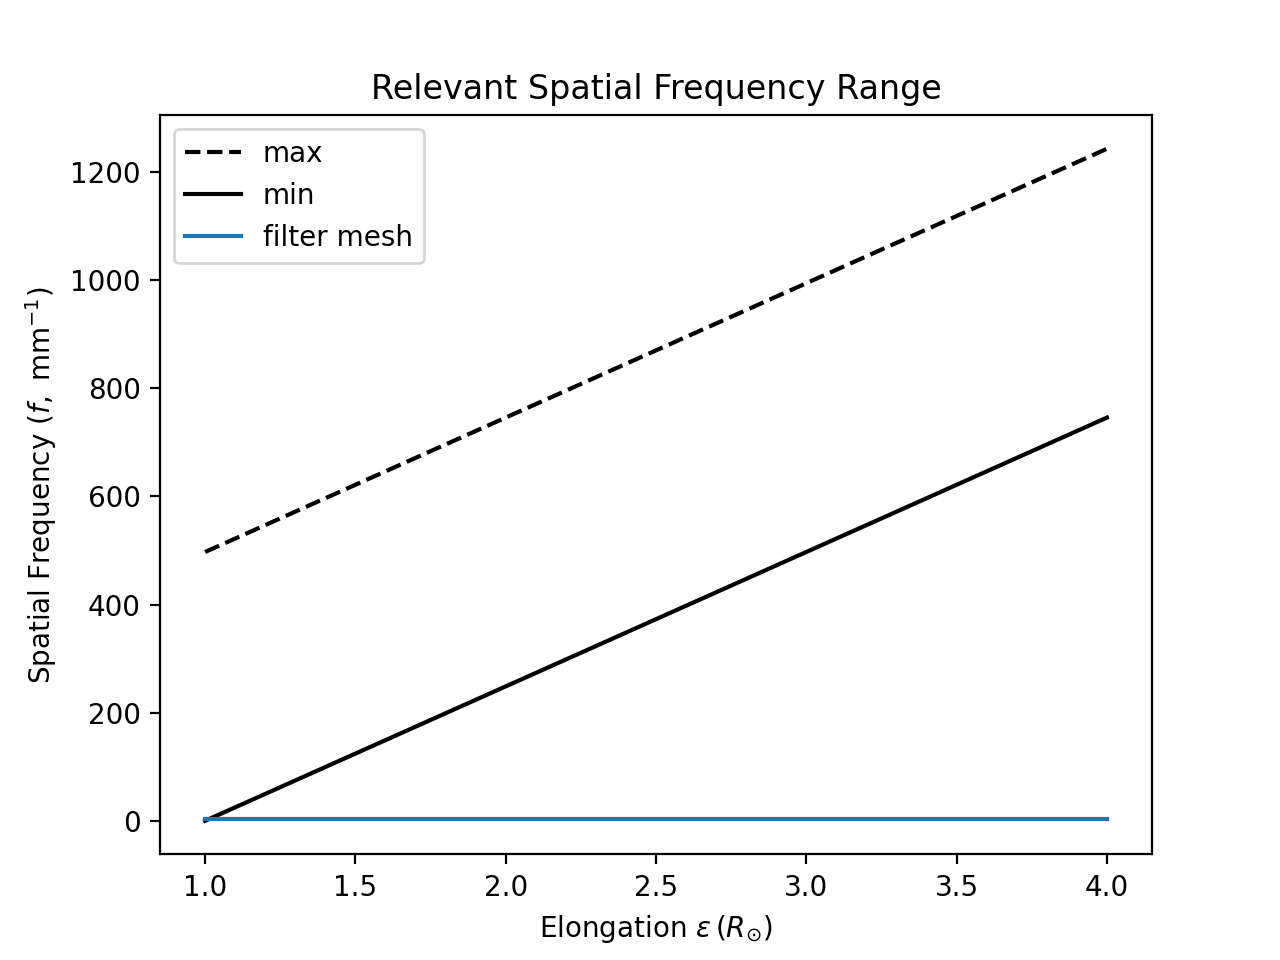

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
wav = 19.5  # wavelength (nm)
Rsun = 1000/3600*np.pi/180
    # in radians, from earth (about 4.8e-3)
Npts=10
epsilon_Rsun = np.linspace(1.0, 4.0, Npts)
epsilon_rad = epsilon_Rsun * Rsun
beta_min = epsilon_rad - Rsun
beta_max = epsilon_rad + Rsun
f_min = beta_min/wav
f_max = beta_max/wav
f_min_mm = 1e6 * f_min
f_max_mm = 1e6 * f_max
plt.plot(epsilon_Rsun, f_max_mm, 'k--', label='max')
plt.plot(epsilon_Rsun, f_min_mm, 'k-', label='min')
plt.title('Relevant Spatial Frequency Range')
plt.xlabel(r'Elongation $\varepsilon \, (R_{\odot})$')
plt.ylabel(r'Spatial Frequency ($f,\ \mathrm{mm}^{-1}$)')

mesh_fundamental_mm = 70 / 25.4  # Standard Luxél 70 lpi mesh, in mm-1.

plt.plot(epsilon_Rsun, mesh_fundamental_mm * np.ones((Npts)), label='filter mesh')

plt.legend()
plt.show();

## Mirrors
### Roughness
Mirror roughness is characterized by a spatial power spectral distibution (PSD), as a function of spatial frequency $k$. The PSD may be estimated by computing the periodograms of a measured surface profile $z(x)$ with a Hanning window of width $2L$. In practice, this should be averaged over many measurements:
$$
    P(k) = \left< \frac{1}{L}\, \left|  \int_{-L}^{L} 
        \cos^2\left(\frac{\pi x}{2L}\right)\, z(x)\,
        \exp(ikx)\,dx \right|^2 \right>_{\text{many } z(x)},
$$
Because of Parseval's theorem, the RMS roughness $\sigma$ is given by
$$
    \sigma^2 = \int_{-\infty}^{\infty} P(k)\,dk.
$$

### Danger! Ambiguities abound!
Above I used a _two-sided_ PSD (both positive and negative frequencies included). In this picture, positive and negative frequencies correspond to positive and negative deviation angles in the plane defined by the normal vector and the $x$-coordinate (where roughness was measured). If all you care about is total scattering loss (next section), then  

There are also 1D _single-sided_ PSDs, and also bivariate and radial 2D power spectral distributions. Respectively, these are normalized as follows:
$$
    \sigma^2 = \int_{0}^{\infty} P_{ss}(k)\,dk
    = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \Pi_2(k_x,k_y)\,dk_x\,dk_y
    = 2\pi \int_0^{\infty} P_2(k)\,k\,dk
$$

The single-sided PSD is just $P_{ss} = 2P$. The radial distribution $P_2(k)$ is obtained by radial averaging of $\Pi_2(k_x,k_y)$, provided that $\Pi_2$ is approximately symmetric under rotations about the origin. Given that symmetry, the univariate distributions contain the same information and are related as follows:

$$
    P_2(k) = \frac{1}{2\pi k} P_{ss}(k) = \frac{1}{4\pi k} P(k)
$$

__Sometimes, authors do not clearly specify whether they are using $P(k)$, $P_{ss}(k)$, or $P_2(k)$. Be careful about factors of 2 or $2\pi k$!__

### Total Scatter
The fractional loss of intensity from the PSF core of a telescope primary mirror due to scattering of light at normal incidence depends only on the surface roughness and the wavelength:
$$
    \eta = 1 - \exp\left[ -\left( \frac{4\pi\sigma}{\lambda} \right)^2 \right]
$$
I suspect, but have not verified, that the above expression pertains in the limit of a shallow power law PSD. If $4\pi\sigma \ll \lambda$,
$$
    \eta \approx \left( \frac{4\pi\sigma}{\lambda} \right)^2.
$$
This is the __smooth mirror approximation__. How good is it? Check out the plot below. It is good to within a factor of 2, up until the approximation becomes unphysical ($\eta>1$). The plot also indicates André Maréchal's criterion for a diffraction limited mirror, which corresponds to about 80% of the light in the PSF core.

<IPython.core.display.Javascript object>


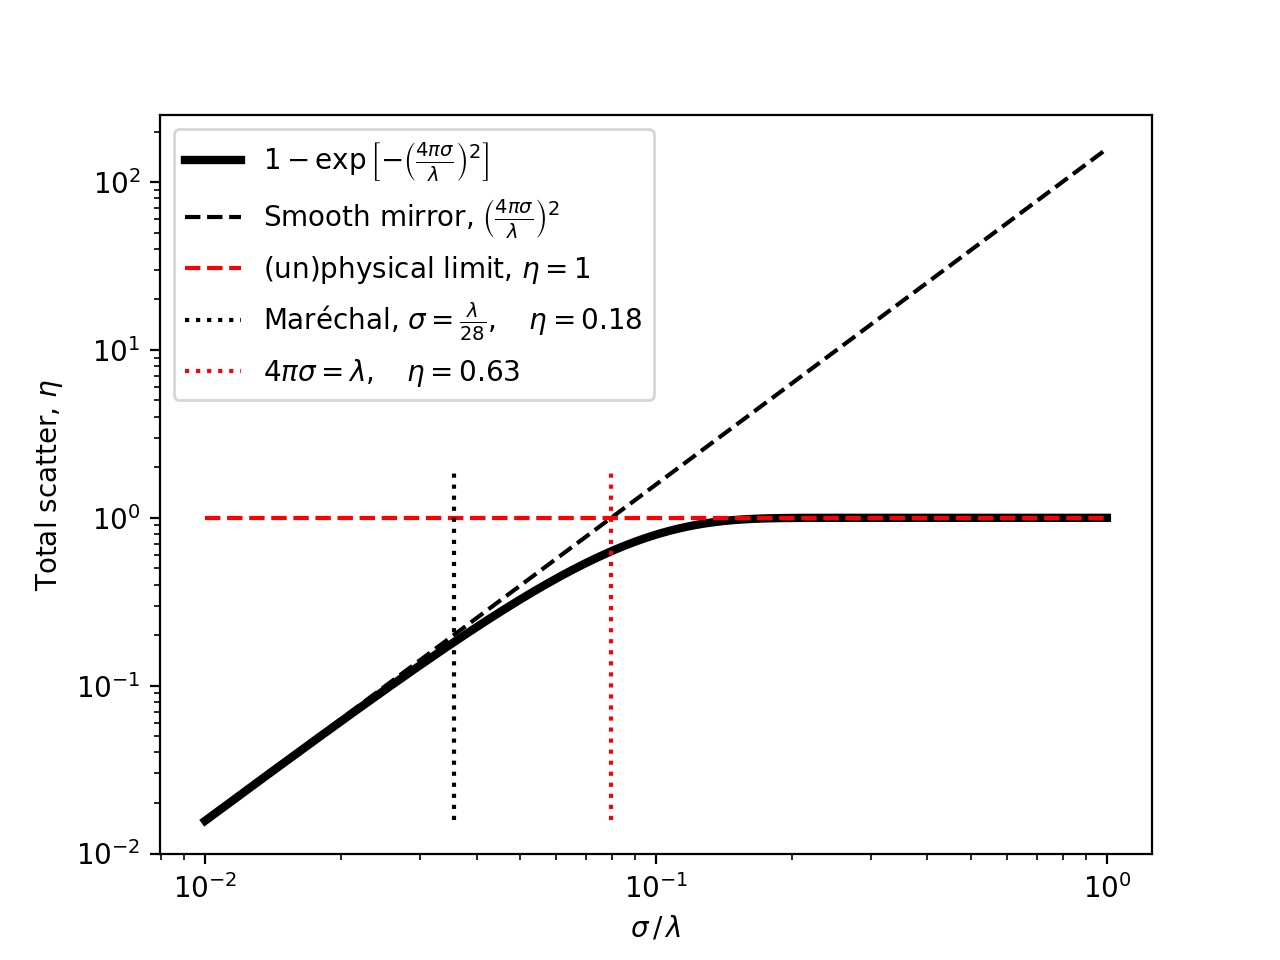

In [3]:
sigma_on_lambda = np.linspace(0.01,1,1000)
eta_max = np.ones(sigma_on_lambda.shape)
eta_approx = (4*np.pi*sigma_on_lambda)**2
eta_exact = 1 - np.exp(-eta_approx)

plt.figure()
plt.loglog(sigma_on_lambda, eta_exact, 'k-', linewidth=3, label=
         r'$1 - \exp\left[ -\left( \frac{4\pi\sigma}{\lambda} \right)^2 \right]$')
plt.plot(sigma_on_lambda, eta_approx, 'k--', label=
         r'Smooth mirror, $\left( \frac{4\pi\sigma}{\lambda} \right)^2$')
plt.plot(sigma_on_lambda, eta_max, 'r--', label='(un)physical limit, $\eta=1$')
plt.plot([1/28,1/28], [eta_approx[0],2],'k:',
           label=r'Maréchal, $\sigma=\frac{\lambda}{28},\quad \eta=0.18$')
plt.plot([1/(4*np.pi),1/(4*np.pi)], [eta_approx[0],2],'r:',
           label=r'$4\pi\sigma=\lambda,\quad \eta=0.63$')
plt.ylabel(r'Total scatter, $\eta$')
plt.xlabel(r'$\sigma\, /\, \lambda$')
plt.legend();

### Angle dependent scatter
From the previous sections, in the smooth mirror limit, we learned that the RMS roughness $\sigma^2$ is distributed in $k$, so that the loss attributed to the wavelength range from $k$ to $k+dk$ is: 
$$
    d\eta = \left( \frac{4\pi}{\lambda} \right)^2 \, P(k)\,dk
$$
The relationship we found between wavenumber and scattering angle allows us to make the substitution
$$
    dk = \frac{2\pi}{\lambda}d\beta.
$$
Therefore, the scattering loss between field angles $\beta$ and $\beta + d\beta$ in 2D is
$$
    d\eta = \frac{1}{2}\left( \frac{4\pi}{\lambda} \right)^3 \,
          P\left( \frac{2\pi\beta}{\lambda} \right)\,d\beta.
$$


### Rough Mirrors (Short Wavelengths)
The smooth mirror approximation gave us the idea that angle-dependent scatter is merely about adding up the components of $\sigma^2$ using the grating equation and the PSD. The exact expression for $\eta$ belies this concept. What do we do if the smooth mirror limit $4\pi\sigma \ll \lambda$ is violated, which is most likely to occur with mirrors for EUV and SXR wavelengths?

I propose that we can cheat (following the example of Martinez-Galarce _et al._, 2010 [doi:10.1117/12.864577](https://doi.org/10.1117/12.864577)), renormalizing the above angle-dependent scatter to ensure that its integral gives the correct total $\eta$: 
$$ \boxed{
      d\eta = \left\{1 - \exp\left[ -\left( \frac{4\pi\sigma}{\lambda} \right)^2 \right]\right\}\,
          \left( \frac{2\pi}{\lambda \sigma^2} \right)\,
          P\left( \frac{2\pi\beta}{\lambda} \right)\,d\beta, \quad
} $$
The same relation would hold for $P_{ss}$, provided we remember to use only positive values of $\beta$.

If we instead use the 2D radial PSD, then $P(k)\,dk \longrightarrow 2\pi\,k\,P_2(k)\,dk$, and rather than angle $\beta$ in the plane, we should have a polar angle $\theta$:

$$ \boxed{
      d\eta = \left\{1 - \exp\left[ -\left( \frac{4\pi\sigma}{\lambda} \right)^2 \right]\right\}\,
          \frac{(2\pi)^3}{(\lambda \sigma)^2} \,
          P_2\left( \frac{2\pi\theta}{\lambda} \right)\,\theta\,d\theta
} $$
__The total roughness $\sigma$ in the above equations should be understood as the $\sigma_{\mathrm{ref}}$ in Martinez-Galarce et al., which simply indicates that frequencies $2\pi k = f> 1/\lambda$ do not contribute to scatter.__

## Example: SUVI mirrors

![Plot of SUVI mirror PSD spec.](./SUVI-PSD-spec.png)

Martinez-Galarce et al. presented the above specification for the GOES/SUVI mirrors. The primary mirrors met these specifications for spatial frequencies $f > 6\,\mathrm{mm}^{-1}$, which covers the relevant range for off-disk imaging of the corona (approximately, Region 2 in the figure). For these large wavenumbers, the spec (their equation 5, which is mislabeled as 2D) reduces to a power law 1D PSD,
$$
    P(f) \propto f^{-C},
$$
where $C=1.089$. 

Note that the plot shows a 2D PSD, and the units and power law shown are consistent with that. But the ABC function described in equations 5-6 of the paper, which define the fit parameters, are for the 1D PSD that I have approximated above as a power law. Power over some frequency interval $a<f<b$ is therefore
$$
    \sigma_{ab} = 2\pi \int_a^b P(f)\,f\,df = \mathcal{A}
        \left[ b^{1-C} - a^{1-C} \right],
$$
where $\mathcal{A}$ is a normalization constant that I have set to match the Region 2 integrated roughnesses. That the results agree (approximately) in the other three regions demonstrates that I have interpreted their spectrum correctly. Changing the `pdim` parameter in the code below will show immediately why $P \propto f^{-C}$ cannot be understood as a 2D spectrum.

In [4]:
# Check interpretation of the power law
C = 1.089
AA = 3.4133/20.784143213520256
pdim = 1 # dimensionality of the PSD function
freqRegions = np.array((0.02,0.25,6,700,50000))
Nregions = len(freqRegions)-1
sigmaspec = np.empty((Nregions))
sigma_paper = np.array((3.2999,3.3208,3.4133,2.624))
for i in range(Nregions):
    a=freqRegions[i]
    b=freqRegions[i+1]
    sigmaspec[i] = ( (2*np.pi*AA)/(pdim-C) ) * (b**(pdim-C) - a**(pdim-C))
    print('Region ',i,':  sigma = ',sigmaspec[i], '... Paper has ',sigma_paper[i])
print('Region 0-3 RSS = ', np.sqrt(np.sum(sigmaspec**2)),'... RSS of paper values = ', np.sqrt(np.sum(sigma_paper**2)))

Region  0 :  sigma =  3.3061208311424304 ... Paper has  3.2999
Region  1 :  sigma =  3.231425270860738 ... Paper has  3.3208
Region  2 :  sigma =  3.4133 ... Paper has  3.4133
Region  3 :  sigma =  2.045574448313313 ... Paper has  2.624
Region 0-3 RSS =  6.099798024923746 ... RSS of paper values =  6.360270870018038


In [5]:
# For the present problem, I am most interested in Region 2, and 195 Å scattering, so
# I'll give explicit names to the relevant quantities:
fa = freqRegions[2]      # Lower end of frequency range (1/mm)
fb = freqRegions[3]    # Upper end of frequency range (1/mm)
sigma_ab_SUVI = sigmaspec[2]
# Just to confirm:
print('Roughness over ',fa,'/mm < f < ',fb,'/mm is ',sigma_ab_SUVI,' Å.')
sigma_ref_195_SUVI = 6.747 # Reference roughness for 195 Å (Å)
eta_195_SUVI = 0.1721 # Total integrated scatter for 195, per Martinez-Galarce et al.
eta_ab_SUVI = (sigma_ab_SUVI / sigma_ref_195_SUVI) * eta_195_SUVI
print('Scatter attributed to this interval: ', eta_ab_SUVI)

Roughness over  6.0 /mm < f <  700.0 /mm is  3.4133  Å.
Scatter attributed to this interval:  0.08706520379427896


#### Aside on GHS Theory
Martinez-Galarce _et al._ used Generalized Harvey Shack (GHS) theory, at considerable computational cost. I am puzzled by their choice, because the advantages  of GHS theory (departures from small angle and azimuthal symmetry approximations, and polarization effects) seem to have been irrelevant to their problem. The authors needed to renomalize to obtain the correct total integrated scatter, so I infer that GHS relies on the smooth mirror approximation—same limitation as the simple theory I am using here.

### Scattering PSF
Given a 2D roughness spectrum $P_2(f) = P_2(\theta/\lambda)$, our scattering analysis found this to be proportional to the 2D scattering distribution $d\eta / d\theta$. Consequently, the point spread function (PSF) is 
$$
    \boxed{ K_{\mathrm{scat}}(\theta) \propto \theta\,  P_2(\theta/\lambda) \propto P_{ss}(\theta/\lambda) }
$$

## Filters
The plot in the first section makes the filters look irrelevant, but there are additional considerations:
1. The power spectrum of the filter mesh contains all orders $m$ and falls off gradually, $\propto 1/f^2$.
1. A standard 82% transmissive filter mesh scatters about (1-T) = 18% of the transmitted light into the PSF wings.
1. Disk emission is much brighter than off disk; and the off disk intensity lapse rate may be fast enough for the filter mesh to overtake the coronal intensity at large radii.

The intensity pattern from the filter mesh, for small scatter angles, is just given by its Fourier transform.

### Off-disk coronal intensity
Seaton et al. (2021) [doi:10.1038/s41550-021-01427-8](https://doi.org/10.1038/s41550-021-01427-8) analyzed images from the SUVI off-point campaign. Here is their figure 1. I have digitized the 195 Å brightness and background.

![Seaton et al. (2021) Figure 1](./Seaton2021-fig1.png)


<IPython.core.display.Javascript object>


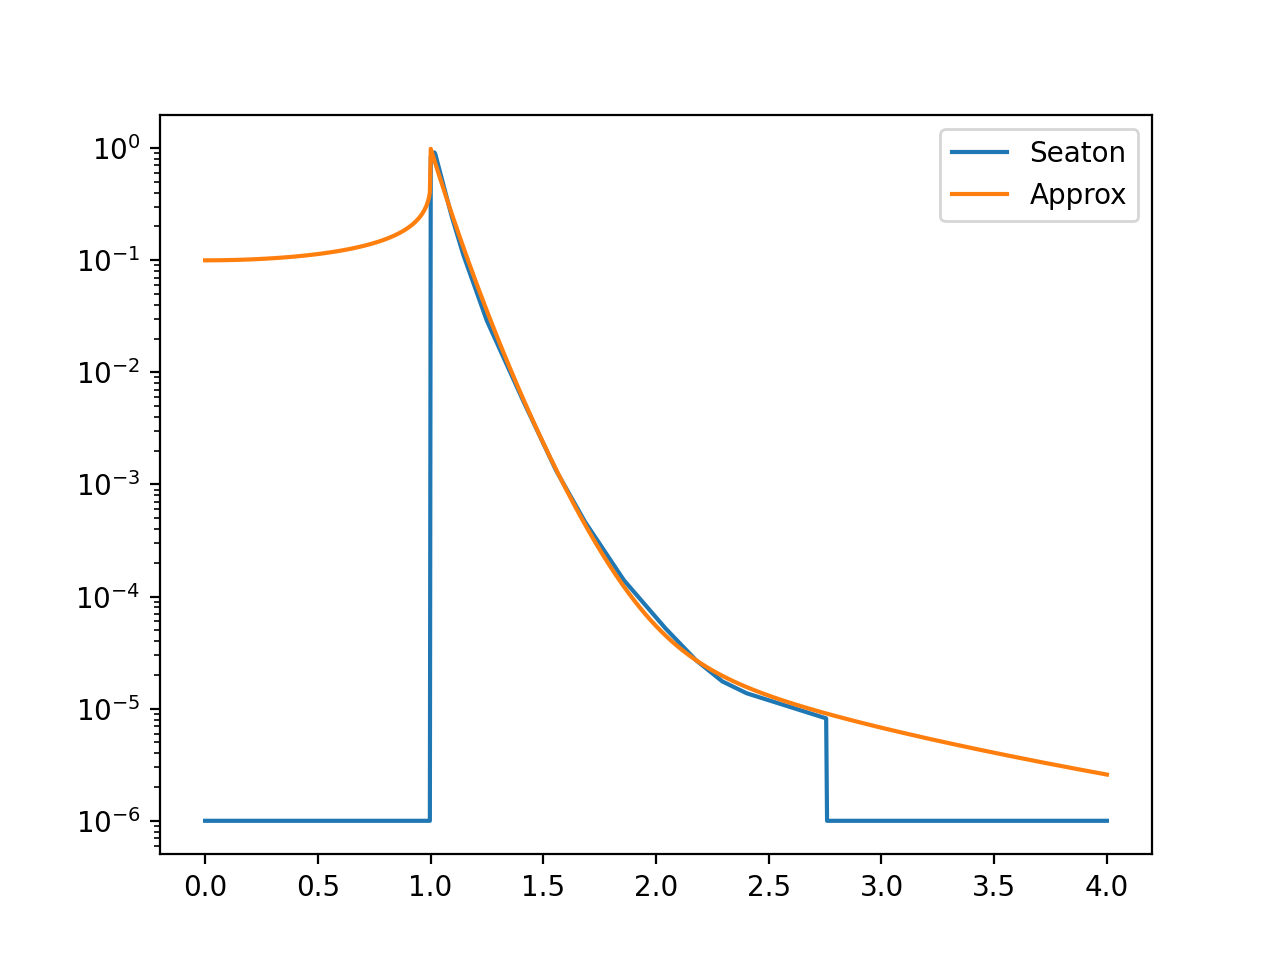

In [6]:
# Model of coronal intensity

# Background fit (exponential)
def seaton_bg(elongation):
    r1  = 2.00386
    r2  = 3.49981
    bg1 = 4.50e-5
    bg2 = 2.90e-5
    h_bg = (r2-r1)/(bg2/bg1)
    A_bg = bg1 * np.exp(r1/h_bg)
    return A_bg * np.exp(-elongation/h_bg)

def seaton_corona(elongation):
    r = np.array([1.0, 1.0186, 1.04275, 1.0876, 1.14277, 
                 1.24962, 1.4012, 1.55621,1.68362, 1.85574, 
                 2.03811, 2.17572, 2.29268, 2.40273, 2.75697])
    sig = np.array([0.829815, 0.923365, 0.602975, 0.271197, 
                    0.115656, 0.0289608, 0.00618322, 0.00139246, 
                    0.000520153, 0.000189283, 9.74E-05, 6.90E-05, 
                    5.73E-05, 5.16E-05, 4.07E-05])
    logcorona = np.log(sig - seaton_bg(r))
    logresult = np.interp(elongation, r, logcorona, 
                          right=np.log(1e-6), left=np.log(1e-6))
    
    return np.exp(logresult)
    #plt.semilogy(r,sig, label='sig')
    #plt.plot(r,seaton_bg(r), label='bg')
    #plt.plot(r,sig-seaton_bg(r), label='bg-sub')
    #plt.legend()

def ck_corona(elongation, lapse=16):
    """
    Coronal brightness at given elongation angle, assuming a source function that 
    falls off as r^(-lapse). Normalized to maximum limb brightness.
    """
    x = np.linspace(0,4,100) # x is the line of sight integration variable.
        # reach large enough x to reach near zero intensity.
    dx = x[1]-x[0]
    x += dx/2  # midpoint method -- begin 1/2 away from the end.
    r = np.sqrt(x**2 + 1)
    norm = 2*np.sum(r**(-lapse)) * dx
    integral = np.empty(elongation.shape)
    e = np.ravel(elongation)
    i = np.ravel(integral)
    for k in range(len(e)):
        if e[k]>=1: 
            r = np.sqrt(x**2 + e[k]**2)
            i[k] = 2 * np.sum(r**(-lapse)) * dx
        else:
            r = np.sqrt((x+np.sqrt(1-e[k]**2))**2 + e[k]**2)
                # x axis shifted outside the Sun.
            i[k] = np.sum(r**(-lapse)) * dx
    return integral/norm

def ck2_corona(e):
    """
    Model Seaton et al. normalized coronal brightness at elongation angle e,
    using a linear combination of two ck_corona() models with differing
    lapse rates.
    """
    return 0.9998*ck_corona(e, lapse=16) + 0.0002*ck_corona(e, lapse=4)


def ck3_corona(e):
    """
    Accelerated version of ck2_corona(). The latter is called first to
    tabulate values, and then I return interpolants for the input array.
    """
    r = np.linspace(0,10,10000)
    corona = ck2_corona(r)
    return np.interp(e, r, corona, right=0, left=0)
    
r = np.linspace(0,4,1000)
coroner = seaton_corona(r) # 1D corona to plot
plt.figure()
plt.semilogy(r, coroner, label='Seaton')
plt.plot(r, ck3_corona(r), label='Approx')
plt.legend()
plt.show();

In [7]:
def L10(x, threshold=-100):
    """
    A log10 function that does not blow up when it sees a zero. The value 
    threshold is returned for any inputs that are less than 10**(threshold).
    Typically threshold should be a negative number, as with the default.
    
    This is handy for scaling images, for display purposes.
    """
    x = np.asarray(x)
    result = np.empty(x.shape)
    where_OK = (x>(10**threshold))
    result[where_OK] = np.log10(x[where_OK])
    result[np.logical_not(where_OK)] = threshold
    return result

In [8]:
# Simulated coronal image
xmin = -6
xmax = 6
Nx = Ny = 4096
xy = np.linspace(xmin, xmax, Nx)
xarr, yarr = np.meshgrid(xy,xy, indexing='xy')
rarr = np.sqrt(xarr**2 + yarr**2)

%time corona = ck3_corona(rarr)

CPU times: user 373 ms, sys: 4.41 ms, total: 378 ms
Wall time: 378 ms


<IPython.core.display.Javascript object>


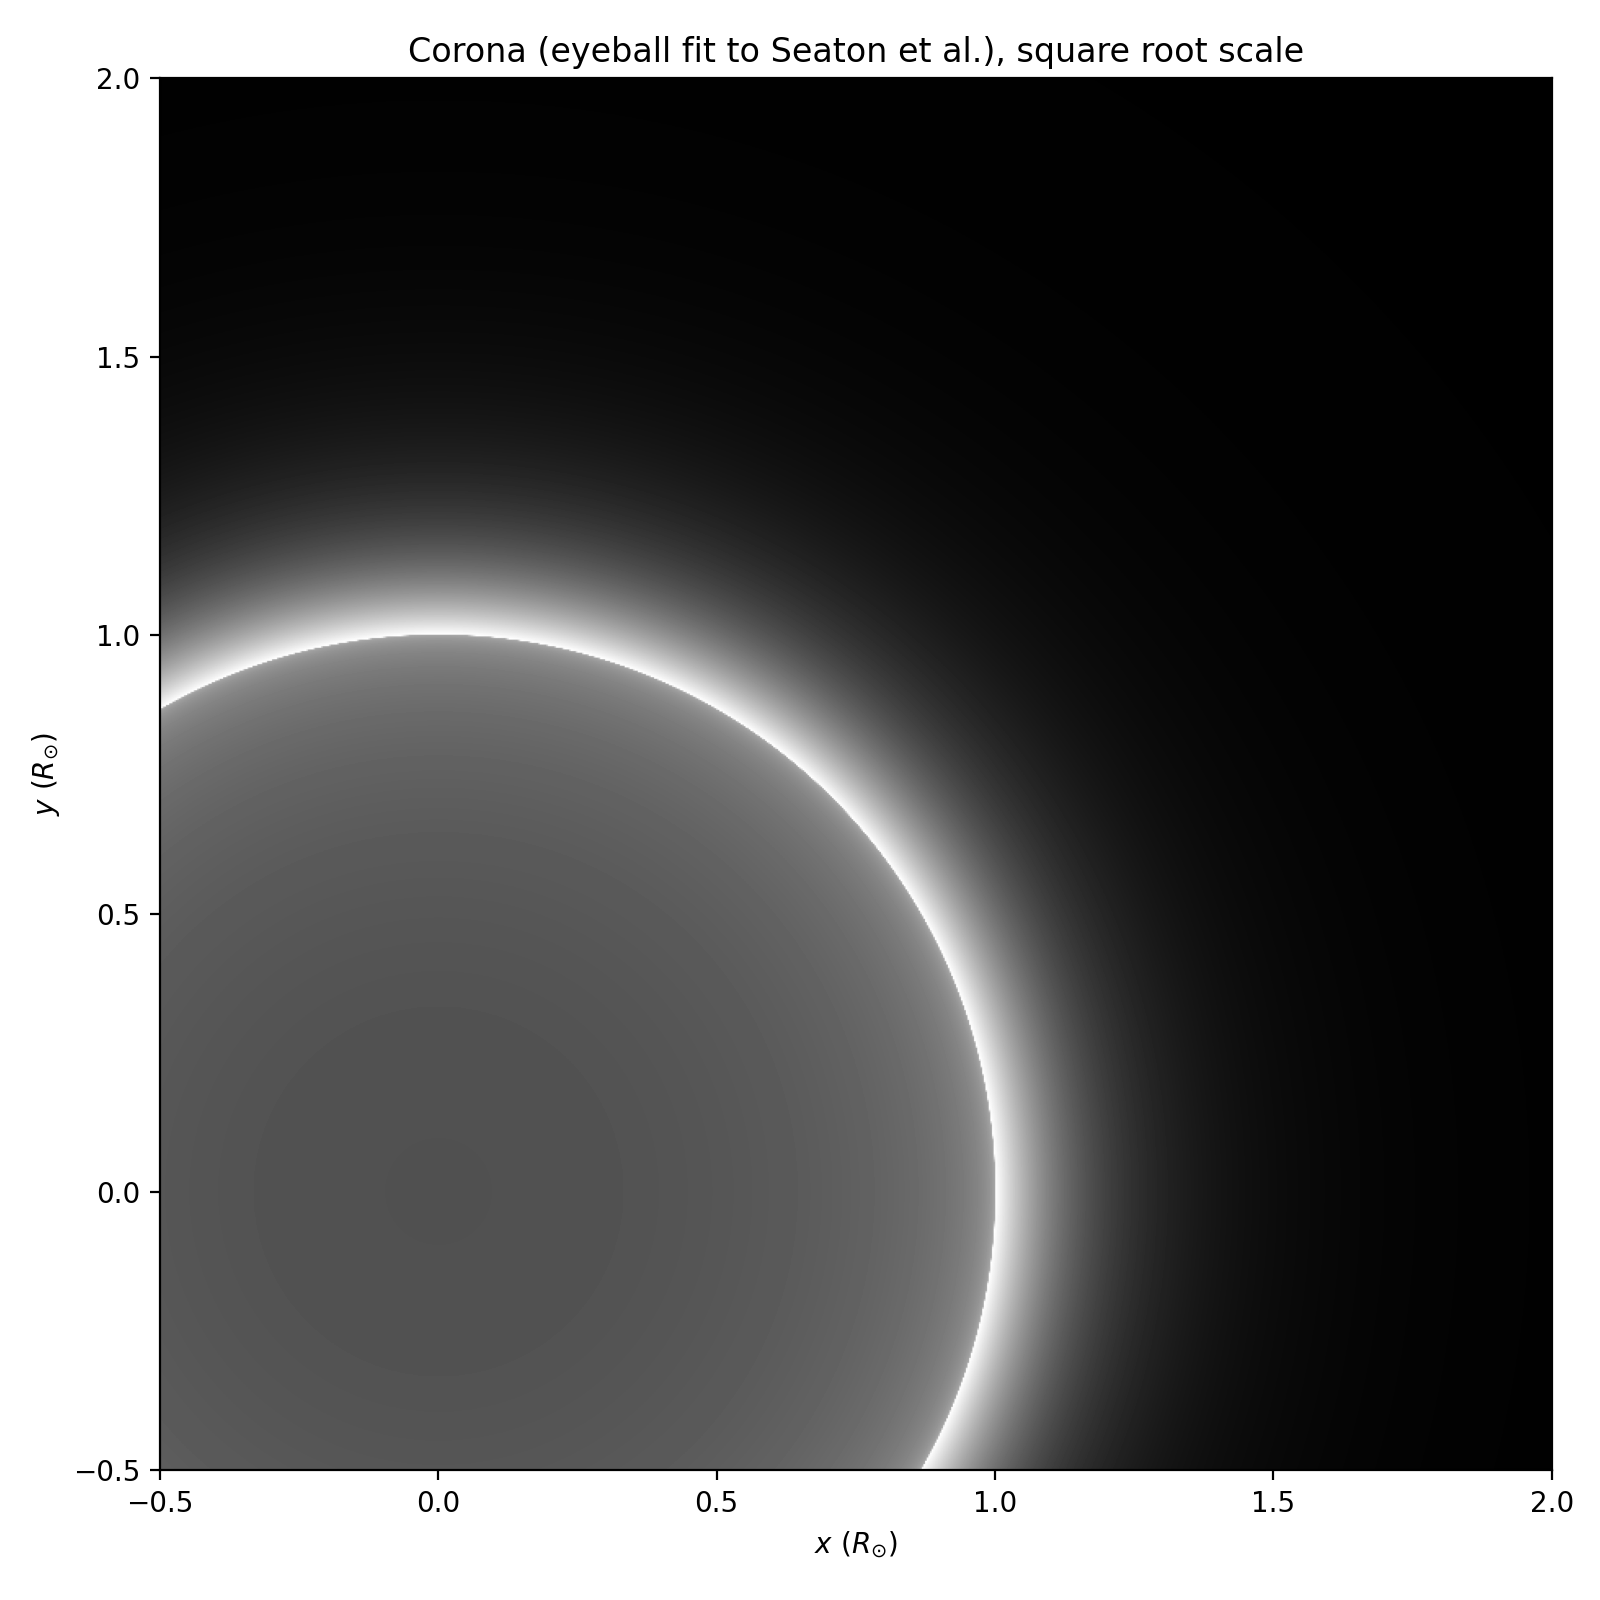

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(corona**0.5, origin='lower', cmap='gray',
           extent=(xmin,xmax,xmin,xmax))
plt.title('Corona (eyeball fit to Seaton et al.), square root scale')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-0.5,2))
plt.ylim((-0.5,2))
plt.tight_layout()
plt.show()

Roughness over  6.0 /mm < f <  700.0 /mm is  3.4133  Å.
Scatter attributed to this interval:  0.08706520379427896


<IPython.core.display.Javascript object>


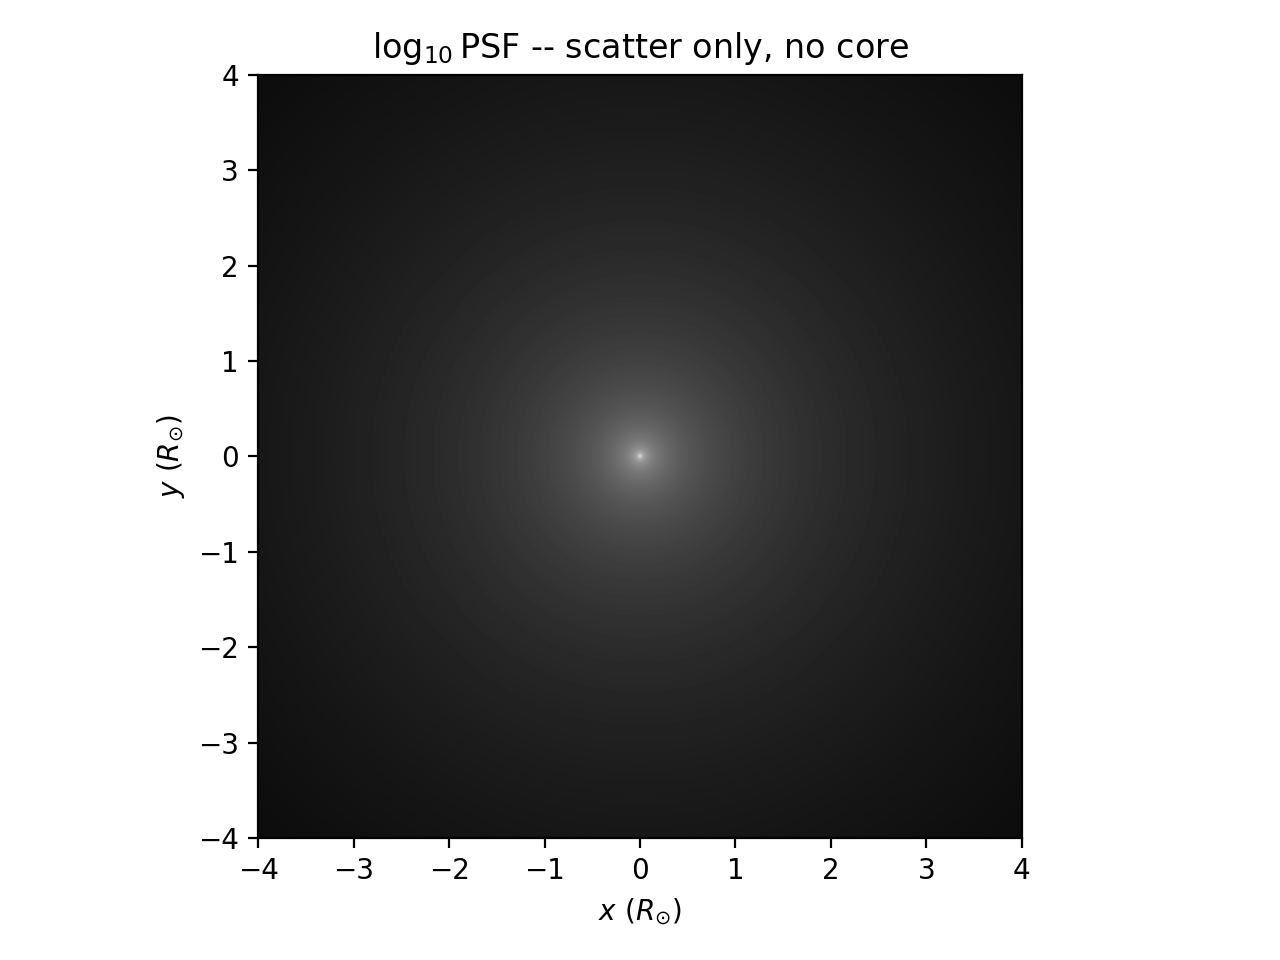

In [10]:
# Scattering model, same units as Martínez-Galarce et al.
wav_SUVI = 195        # SUVI wavelength (Å). Parameters below are for this wavelength.
RMS_ref_SUVI = 6.747  # SUVI spec RMS roughness (Å) for sigma < wavelength.
eta_SUVI = 0.1721     # Total integrated scatter (TIS) for given wavelength.
wav_SUVI_mm = wav_SUVI / 1e7 # Wavelength in mm, to make proper spatial frequencies.
# Note fa, fb, sigma_ab_SUVI, eta_ab_SUVI are inherited from the mirror model above.
print('Roughness over ',fa,'/mm < f < ',fb,'/mm is ',sigma_ab_SUVI,' Å.')
print('Scatter attributed to this interval: ', eta_ab_SUVI)


theta = rarr * 1000 * (1/3600) * np.pi/180 # scattering angles in radians, 
    # on same coord system as our solar image.
    # 1000 arcsec/Rsun, 1 deg/3600 arcsec, π rad / 180 deg.
frequencies = theta / wav_SUVI_mm
    # mirror spatial frequencies associated with all scattering angles (1/mm)

# We discovered that the PSF is proportional to the 1D PSD, evaluated at the appropriate frequency.
PSF = np.zeros(rarr.shape)
PSF[frequencies > 0.02] = (frequencies[frequencies > 0.02])**(-C)

normalization = eta_ab_SUVI/np.sum(PSF[(frequencies>fa) & (frequencies<fb)])
PSF *= normalization
plt.figure()
plt.imshow(np.log10(PSF), origin='lower', cmap='gray',
           extent=(xmin,xmax,xmin,xmax))
plt.title('$\log_{10}$PSF -- scatter only, no core')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


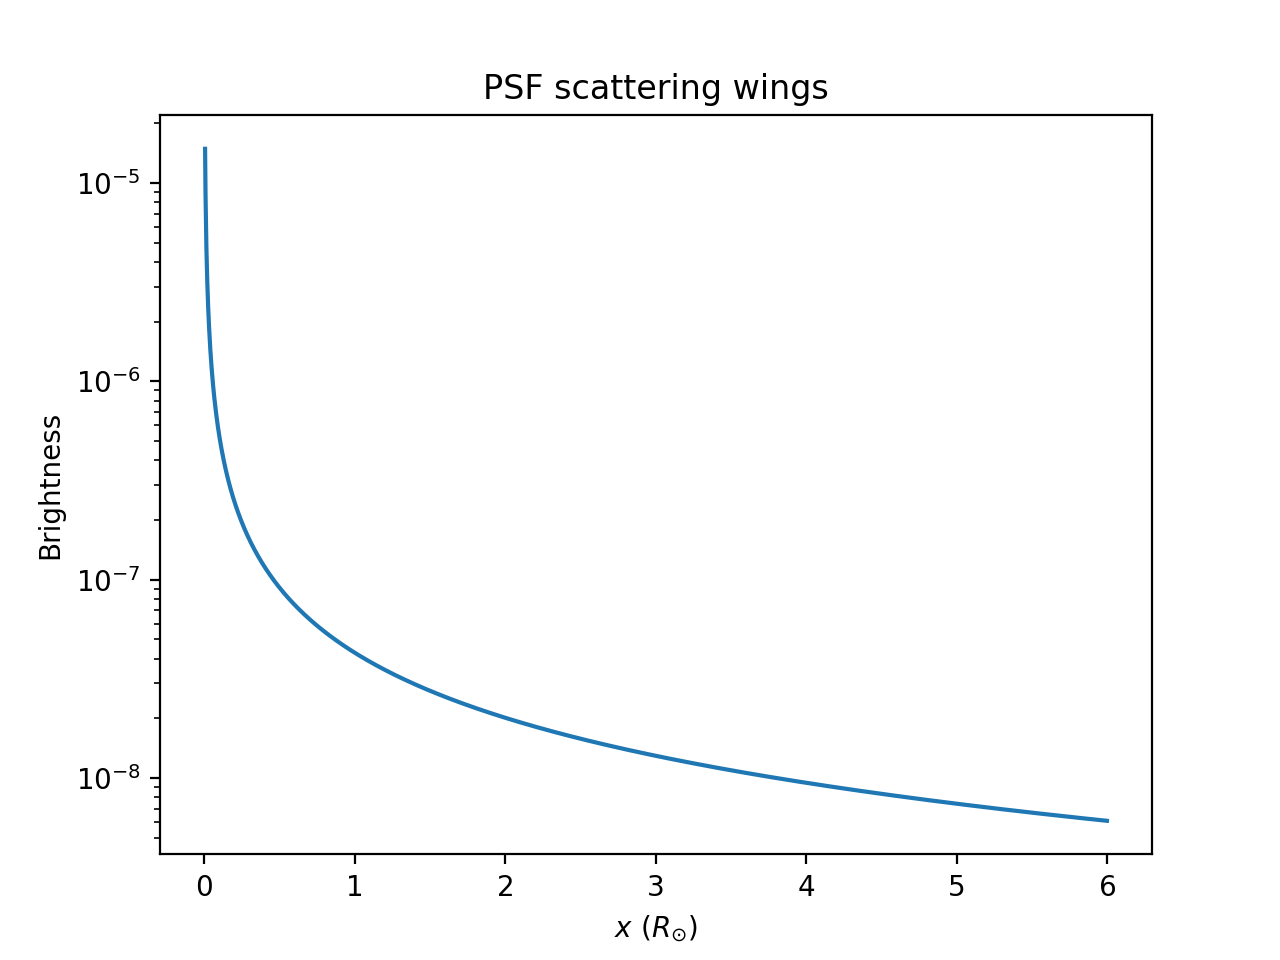

In [11]:
r1d = rarr[Nx//2+1:-1,Nx//2]
PSF1d = PSF[Nx//2+1:-1,Nx//2]

plt.figure()
plt.semilogy(r1d,PSF1d)
plt.title('PSF scattering wings')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'Brightness')
plt.show()

In [12]:
### CONVOLUTION WITH THE CORONA ###
def pad(image):
    (Nx,Ny) = image.shape
    padded = np.zeros((2*Nx, 2*Ny))
    padded[0:Nx, 0:Ny] = image
    return padded

def unpad(padded):
    (Nx,Ny) = padded.shape
    image = padded[0:Nx//2, 0:Ny//2]
    return image

# FFT PSF for convolution
fPSF_padded = np.absolute( np.fft.fft2(pad(PSF)) )
    # Since the PSF is symmetric, the np.absolute() centers it on the origin.
fcorona_padded = np.fft.fft2(pad(corona))

background = unpad( np.real(np.fft.ifft2(fPSF_padded*fcorona_padded)) )

<IPython.core.display.Javascript object>


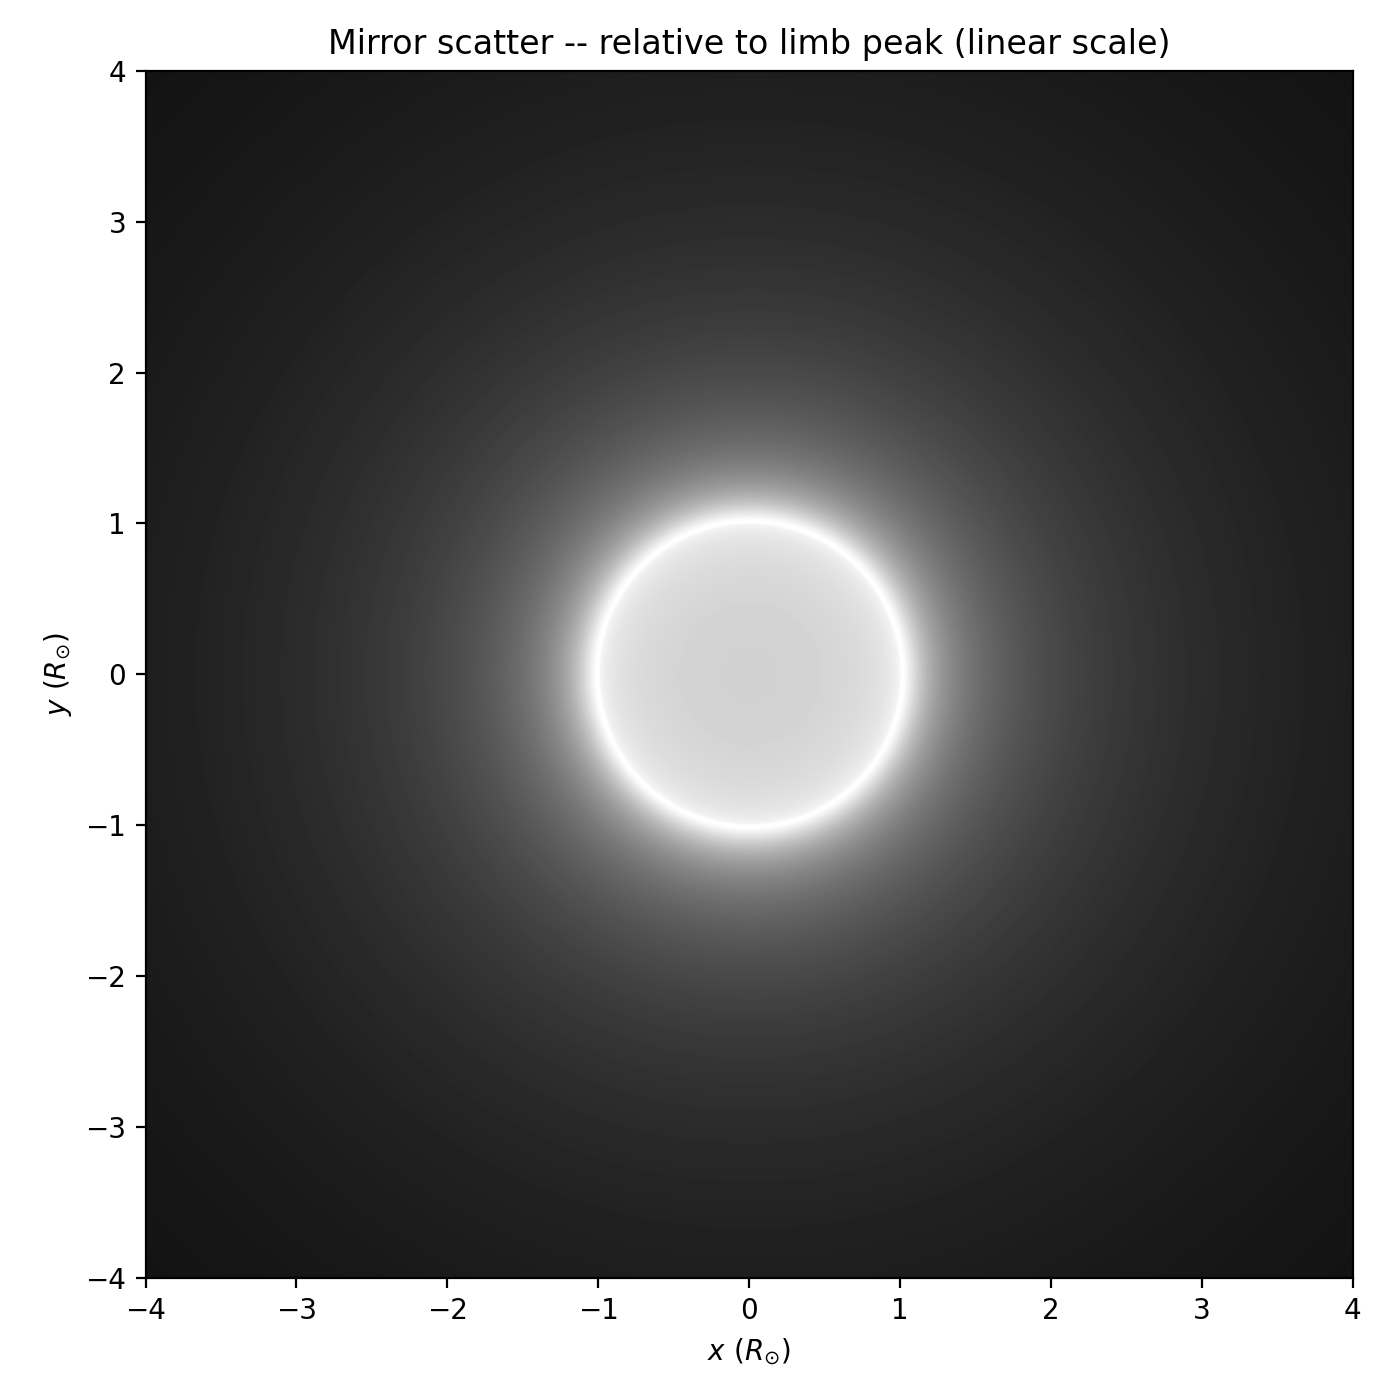

In [13]:
plt.figure(figsize=(7,7))
plt.imshow(background, origin='lower', cmap='gray',
           extent=(xmin,xmax,xmin,xmax))
plt.title('Mirror scatter -- relative to limb peak (linear scale)')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


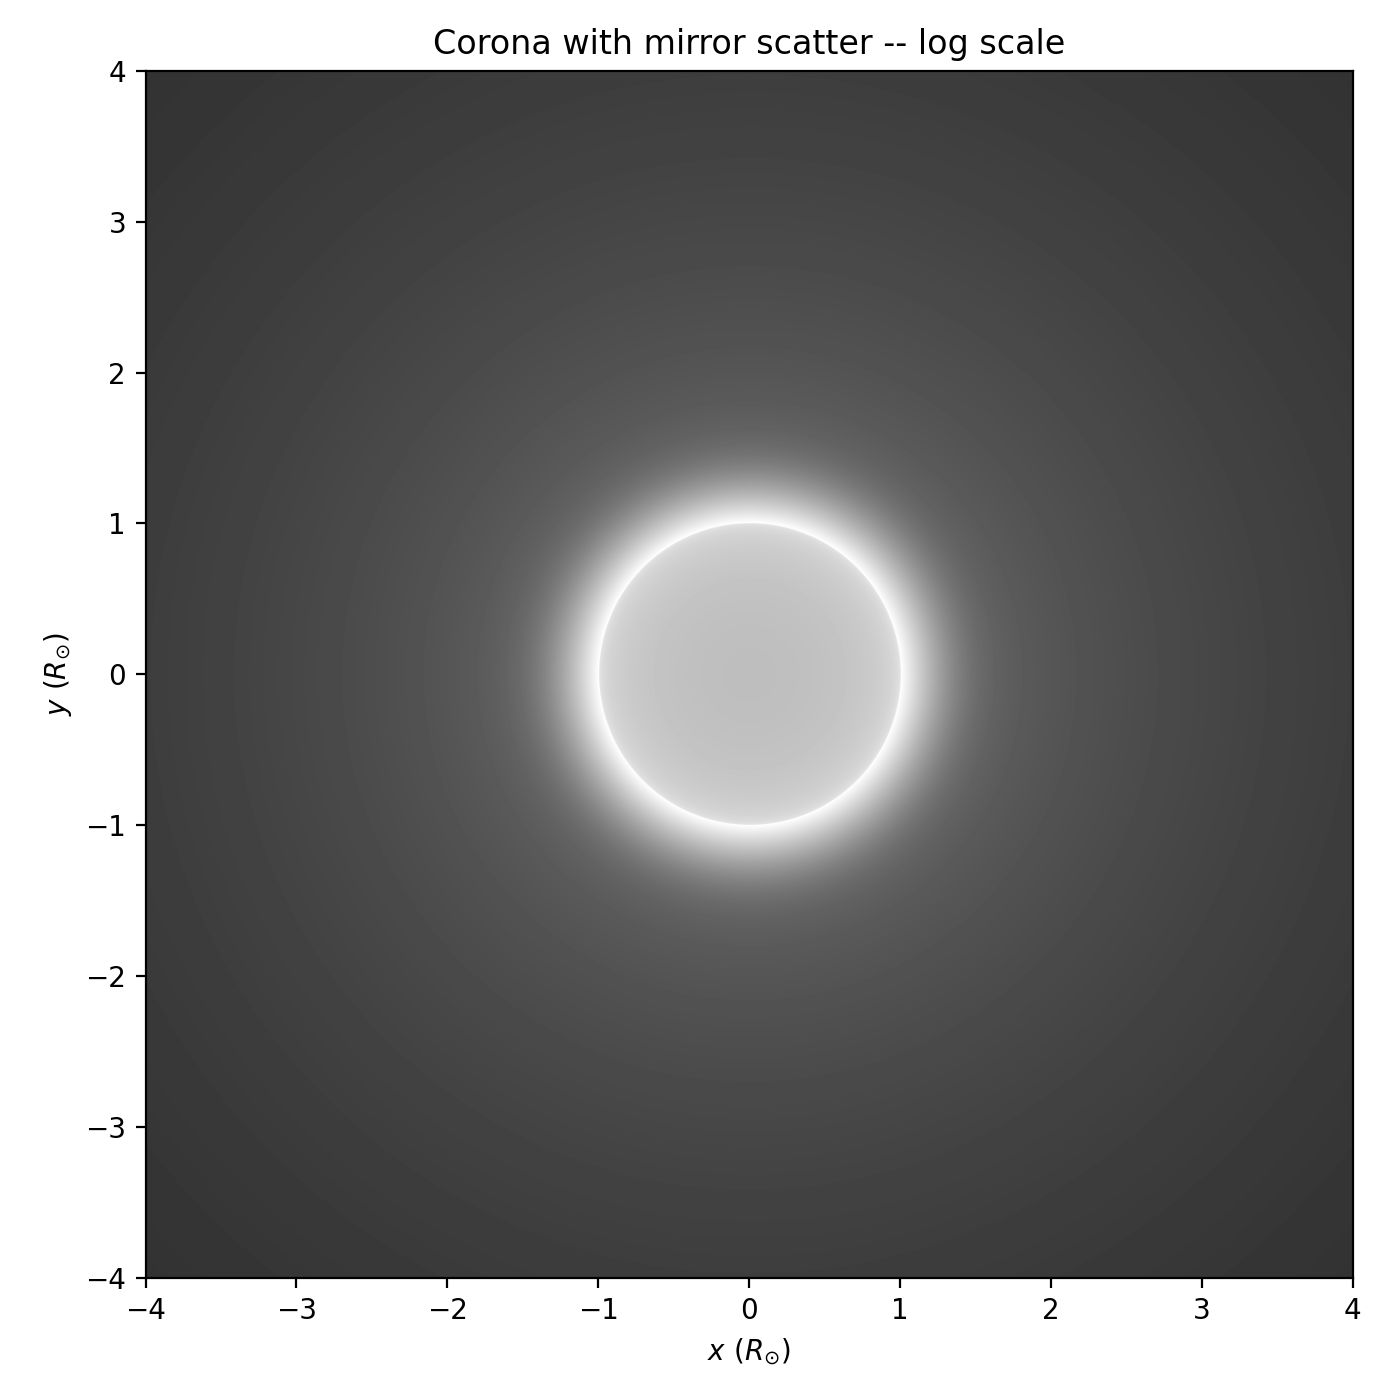

In [14]:
# What we would see
signal_mirror_only = corona * (1 - eta_SUVI) + background
plt.figure(figsize=(7,7))
plt.imshow(L10(signal_mirror_only), origin='lower', cmap='gray',
           extent=(xmin,xmax,xmin,xmax))
plt.title('Corona with mirror scatter -- log scale')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


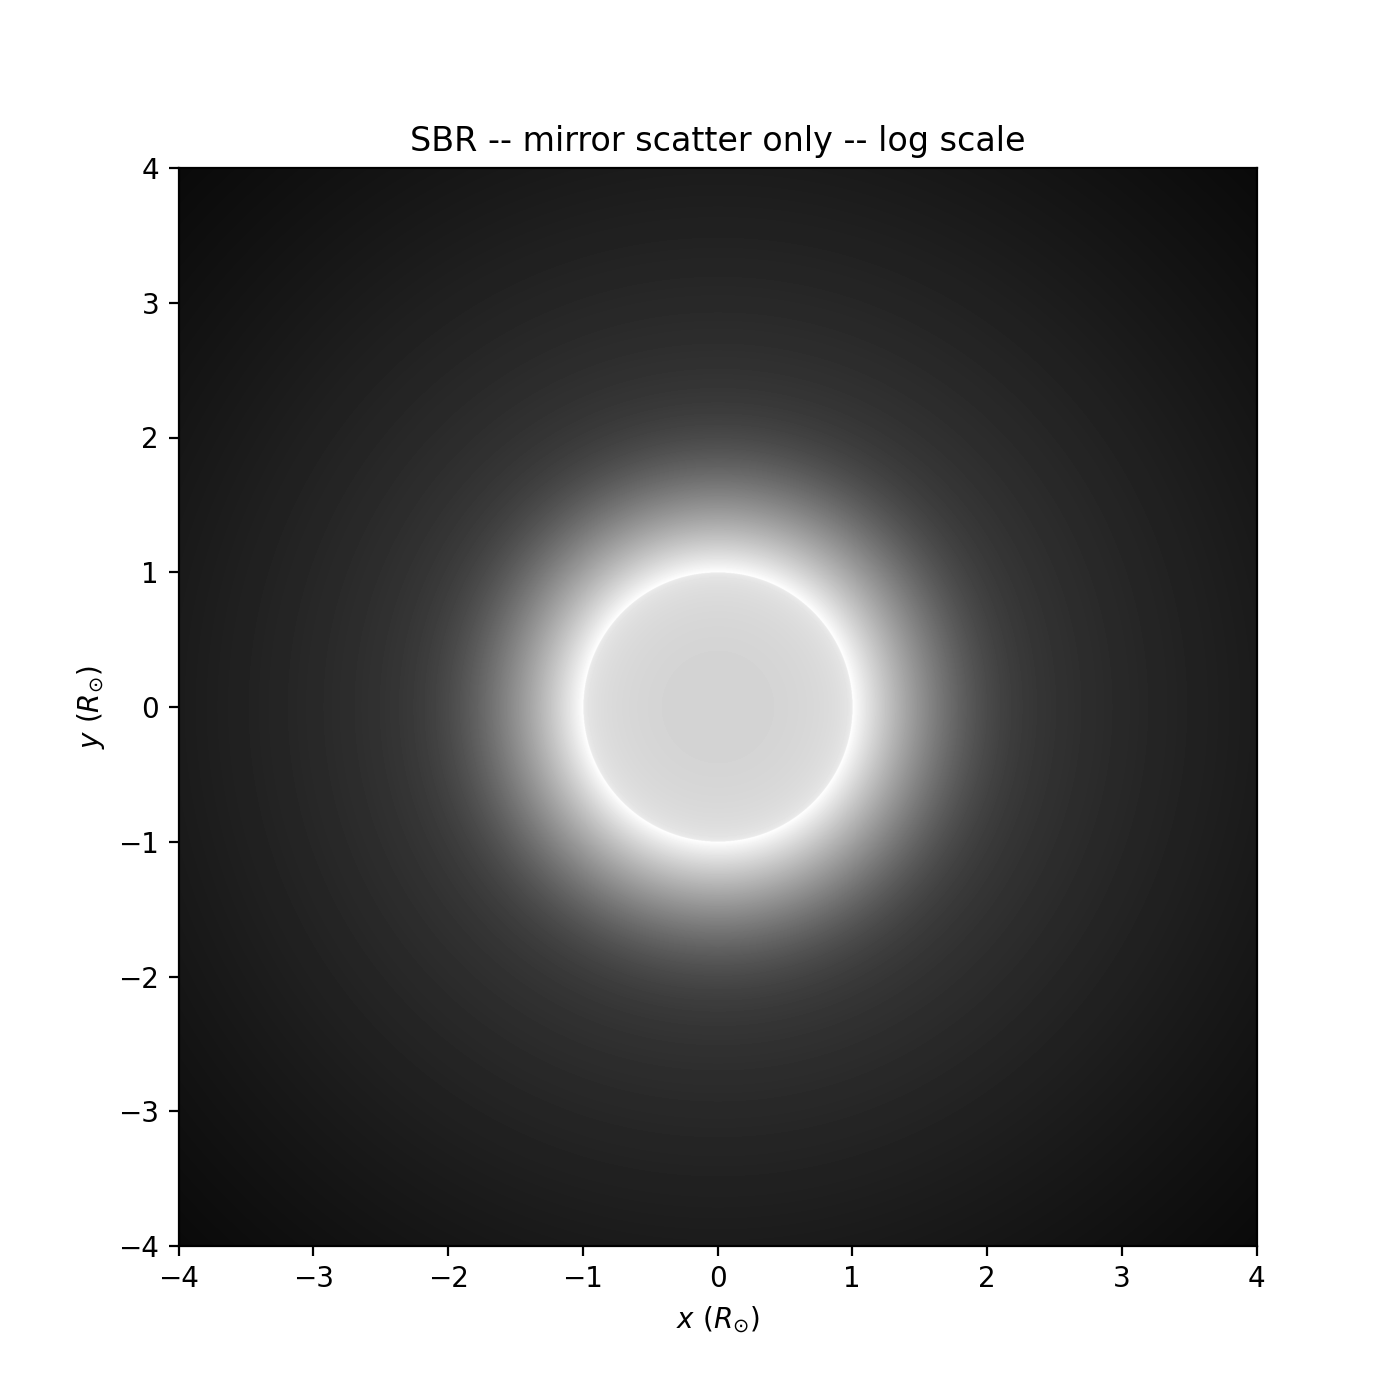

In [15]:
SBR = (corona * (1 - eta_SUVI))/background

plt.figure(figsize=(7,7))
plt.imshow(L10(SBR), origin='lower', cmap='gray',
           extent=(xmin,xmax,xmin,xmax))
plt.title('SBR -- mirror scatter only -- log scale')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.show()

## Check the PSF by inverse transforming. Should be centered in LL corner.
#PSF_LL = np.real(np.fft.ifft2(fPSF))
#plt.figure()
#plt.imshow(np.log10(PSF_LL), origin='lower', cmap='gray',
#           extent=(xmin,xmax,xmin,xmax))
#plt.title('$\log_{10}$PSF -- scatter only -- LL shifted')
#plt.xlabel(r'$x\ (R_{\odot})$')
#plt.ylabel(r'$y\ (R_{\odot})$')
#plt.show()

Normalization:  1.0000000000000016
Total integrated scatter:  0.1800379157066334
Coincidentally, the above is comparable to TIS of 195Å for SUVI mirror spec:  0.1721
Nyquist frequency =  5644.094488188977 cycles per mm
Area fill factor T =  0.8199620842933655 ; 1-T =  0.18003791570663452
Scattering calculated to  22.69038738973841  Rsun. Trust to ~half that (due to aliasing).


<IPython.core.display.Javascript object>


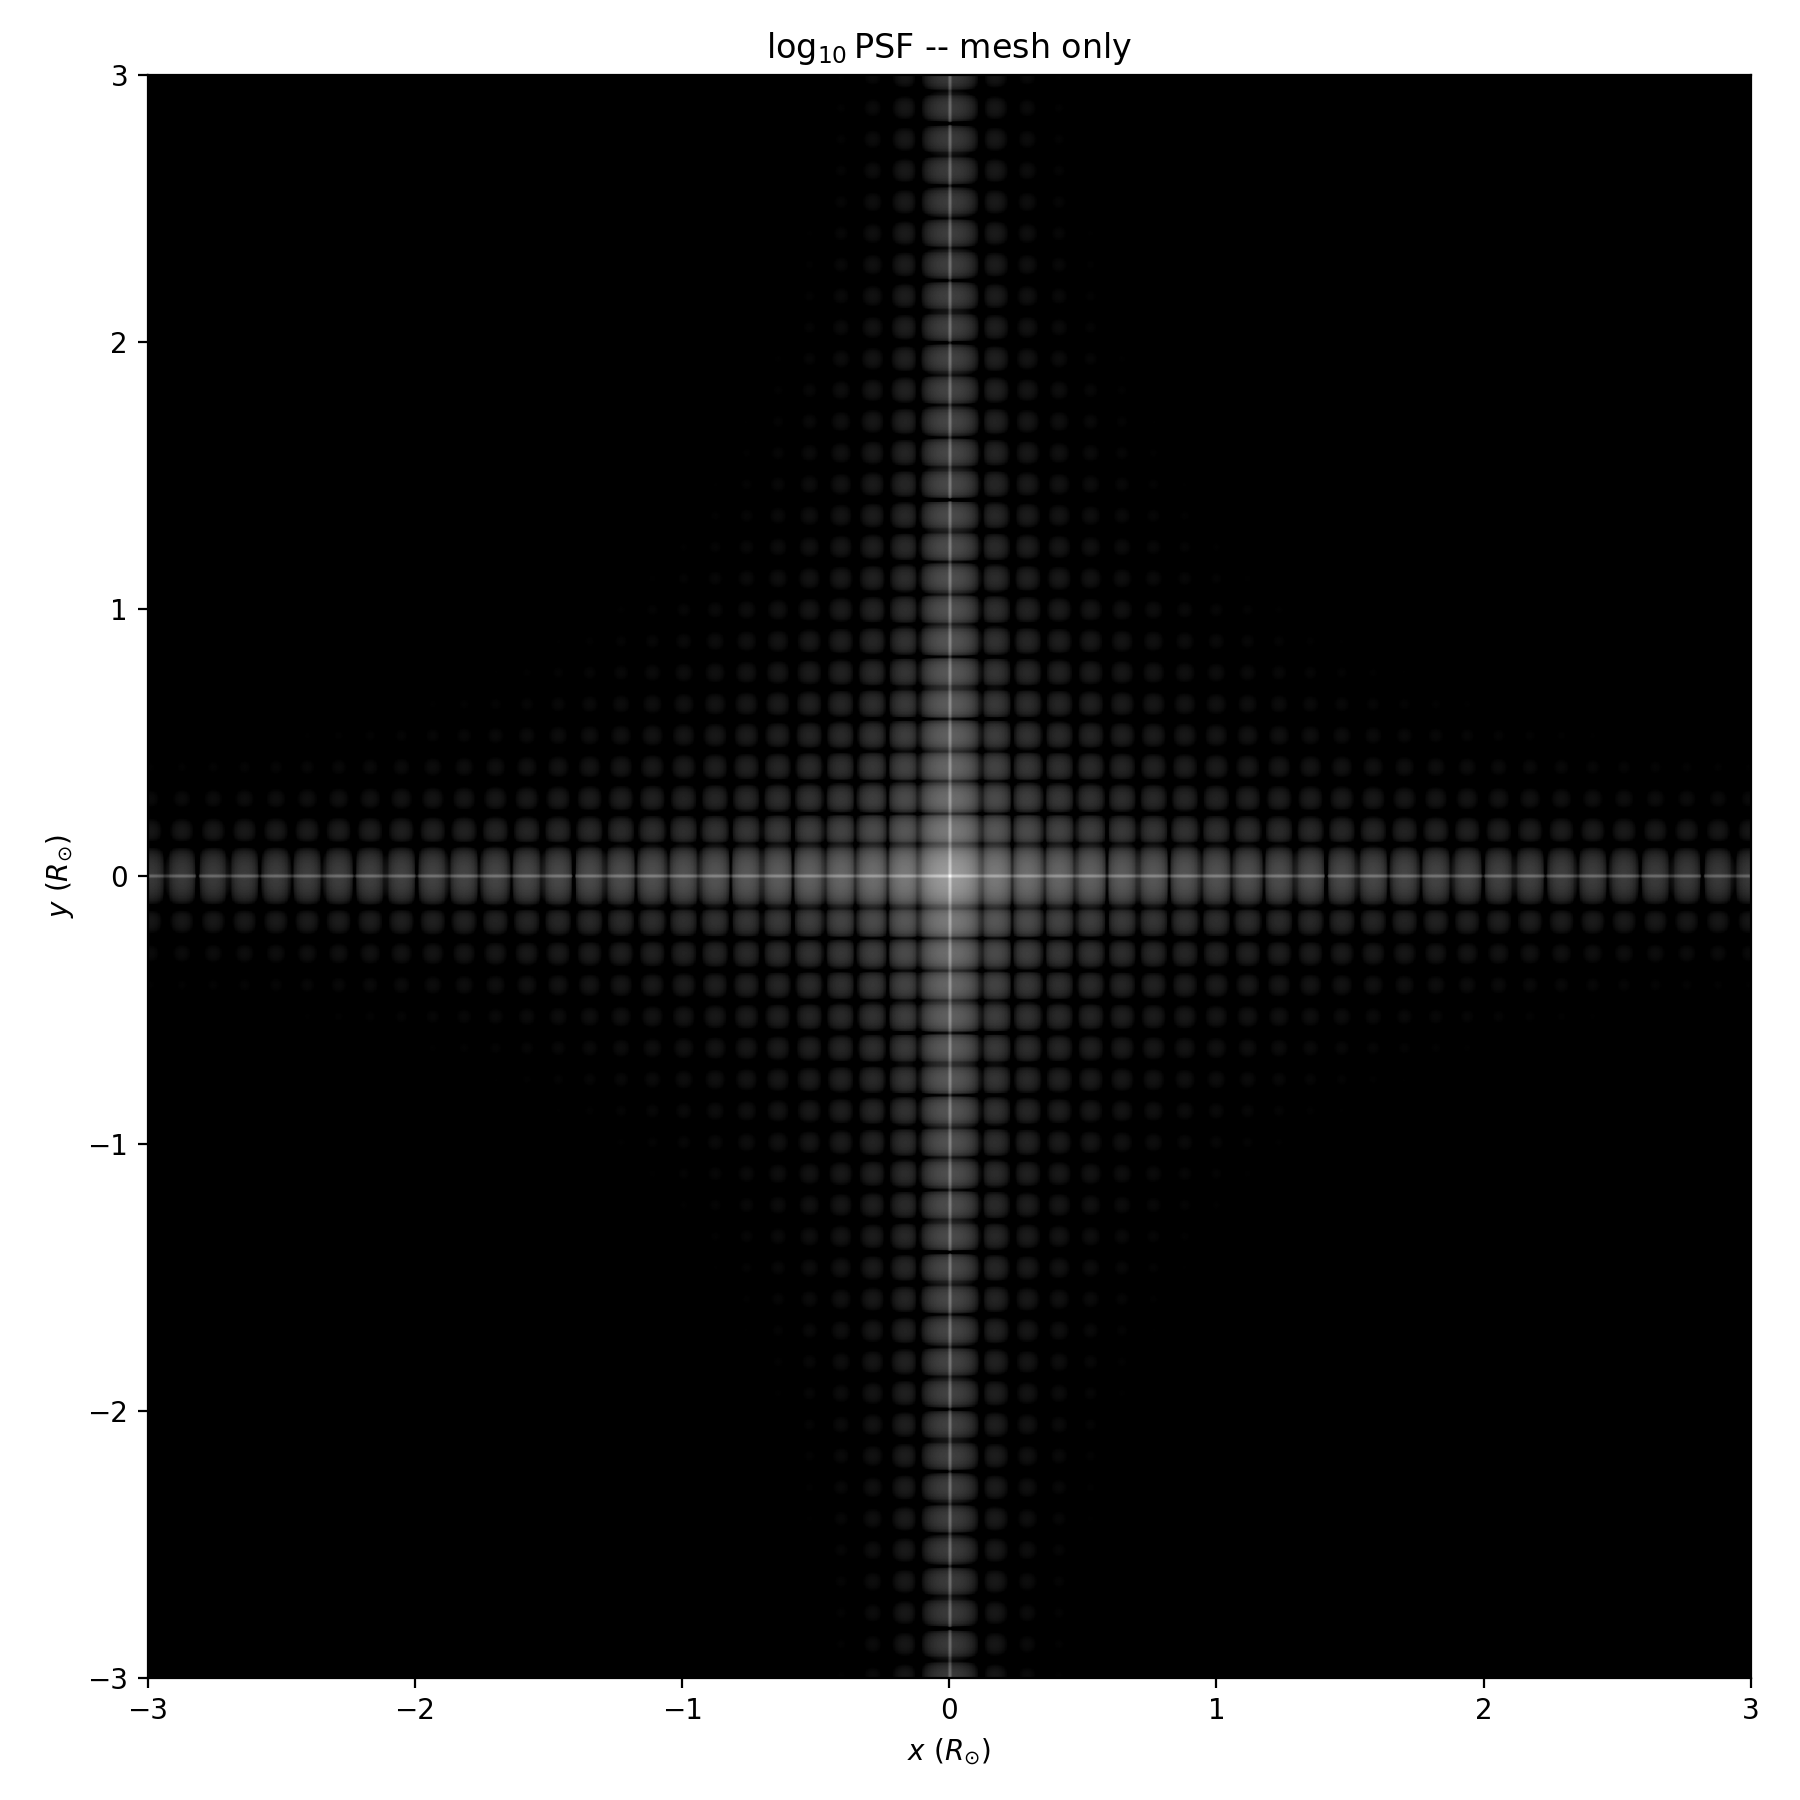

In [16]:
# Filter mesh model (a unit cell of the square mesh)
# Need Nyquist frequency >> 2k cycles/mm to get diffraction out to 6 Rsun. Has
# to be >> to avoid errors due to aliasing.
area_fill_factor = 0.82  # per Luxél spec
linear_fill_factor = np.sqrt(area_fill_factor)
pixels_per_cell = 4096
pixels_filled_per_cell = int(round(pixels_per_cell*linear_fill_factor))
lpi = 70.0 # mesh grid lines per inch
dx_in = 1.0 / pixels_per_cell / lpi
dx_mm = dx_in * 25.4

mesh_cell = np.zeros((pixels_per_cell, pixels_per_cell))
mesh_cell[0:pixels_filled_per_cell, 0:pixels_filled_per_cell] = 1.0
mesh_PSF = abs(np.fft.fft2(mesh_cell))**2
mesh_PSF /= np.sum(mesh_PSF)
# check normalization and total integrated scatter.
print('Normalization: ', np.sum(mesh_PSF))
print('Total integrated scatter: ', (1-mesh_PSF[0,0]))
print('Coincidentally, the above is comparable to TIS of 195Å for SUVI mirror spec: ', eta_195_SUVI)

mesh_PSF_centered = np.roll(mesh_PSF, 
        (pixels_per_cell//2,pixels_per_cell//2), axis=(0,1))
fN = 1/(2*dx_mm)  # Nyquist frequency
print('Nyquist frequency = ',fN, 'cycles per mm')
Tmesh = (pixels_filled_per_cell/pixels_per_cell)**2
print('Area fill factor T = ', Tmesh,'; 1-T = ',1-Tmesh)
df = 1/(dx_mm * pixels_per_cell) # Frequency sampling interval, also the fundamental of the mesh model.
dtheta_rad = df * wav_SUVI_mm # Angle sampling on the sky, radians
dtheta_Rsun = dtheta_rad/Rsun
theta_x = (np.arange(pixels_per_cell) - pixels_per_cell//2) * dtheta_Rsun
theta_y = theta_x
print('Scattering calculated to ',theta_x[-1],' Rsun. Trust to ~half that (due to aliasing).')
plt.figure(figsize=(9,9))
plt.imshow(L10(mesh_PSF_centered), vmin=-10, origin='lower', cmap='gray', 
          extent=(theta_x[0],theta_x[-1],theta_y[0],theta_y[-1]))
plt.title('$\log_{10}$PSF -- mesh only')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>


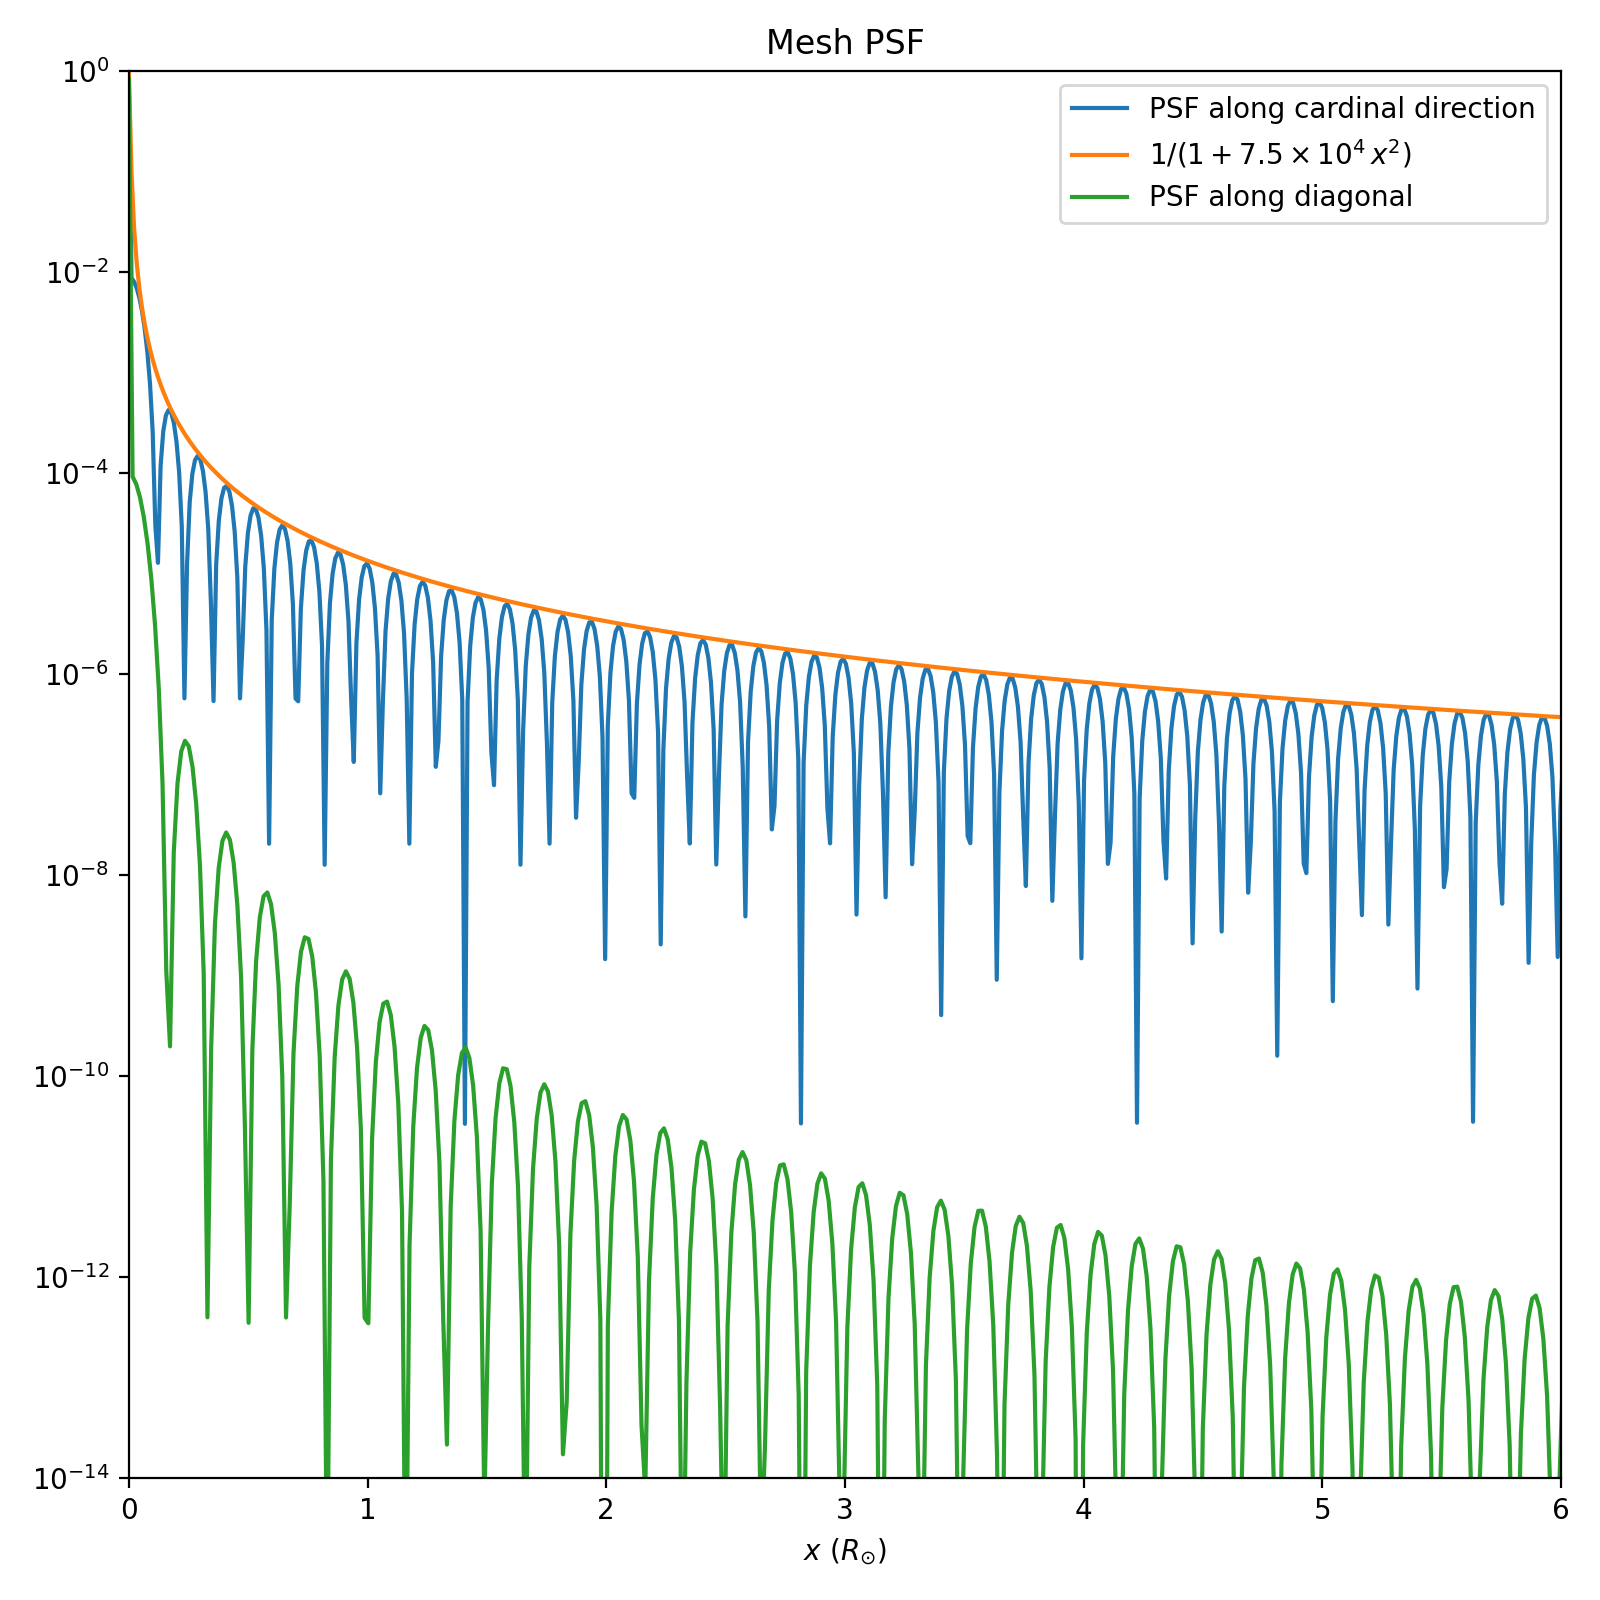

In [17]:
# Mesh PSF on cardinal direction
mesh_PSF_1D = mesh_PSF[0:pixels_per_cell//2,0]
theta_Rsun = np.arange(pixels_per_cell//2) * dtheta_Rsun

# also look at PSF on a diagonal
mesh_PSF_diag = np.empty((pixels_per_cell//2))
theta_Rsun_diag = np.sqrt(2)*theta_Rsun
for i in range(pixels_per_cell//2):
    mesh_PSF_diag[i] = mesh_PSF[i,i]

plt.figure(figsize=(8,8))
plt.semilogy(theta_Rsun, mesh_PSF_1D, label=r'PSF along cardinal direction')
plt.plot(theta_Rsun, 1/(1+7.5e4*theta_Rsun**2), label=r'$1/(1+7.5\times10^4\,x^2)$')
plt.plot(theta_Rsun_diag, mesh_PSF_diag, label=r'PSF along diagonal')
plt.xlim((0,6))
plt.ylim((1e-14,1))
plt.title('Mesh PSF')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.legend()
plt.tight_layout()
plt.show();

In [18]:
# Interpolate mesh PSF onto the coordinates of the simulated corona.
from scipy.interpolate import RegularGridInterpolator 
interp = RegularGridInterpolator((theta_x,theta_y), mesh_PSF_centered)
mesh_PSF_cent_interp = interp((xarr,yarr))
print('New PSF array size: ',mesh_PSF_cent_interp.shape)

renorm1 = np.sum(mesh_PSF_cent_interp)
print('Normalization before correcting: ',renorm1)
renorm2 = ((theta_x[1]-theta_x[0]) / (xy[1]-xy[0]))**2
print('Approximate value based on resampled pixel size: ',renorm2)
print('The latter includes more FOV, but also some aliasing. Not sure which is better, so split the difference.')
mesh_PSF_cent_interp /= (renorm1+renorm2)/2
print('Renormalization check: ',np.sum(mesh_PSF_cent_interp))

New PSF array size:  (4096, 4096)
Normalization before correcting:  14.218402813595931
Approximate value based on resampled pixel size:  14.308478522862107
The latter includes more FOV, but also some aliasing. Not sure which is better, so split the difference.
Renormalization check:  0.9968424270356181


<IPython.core.display.Javascript object>


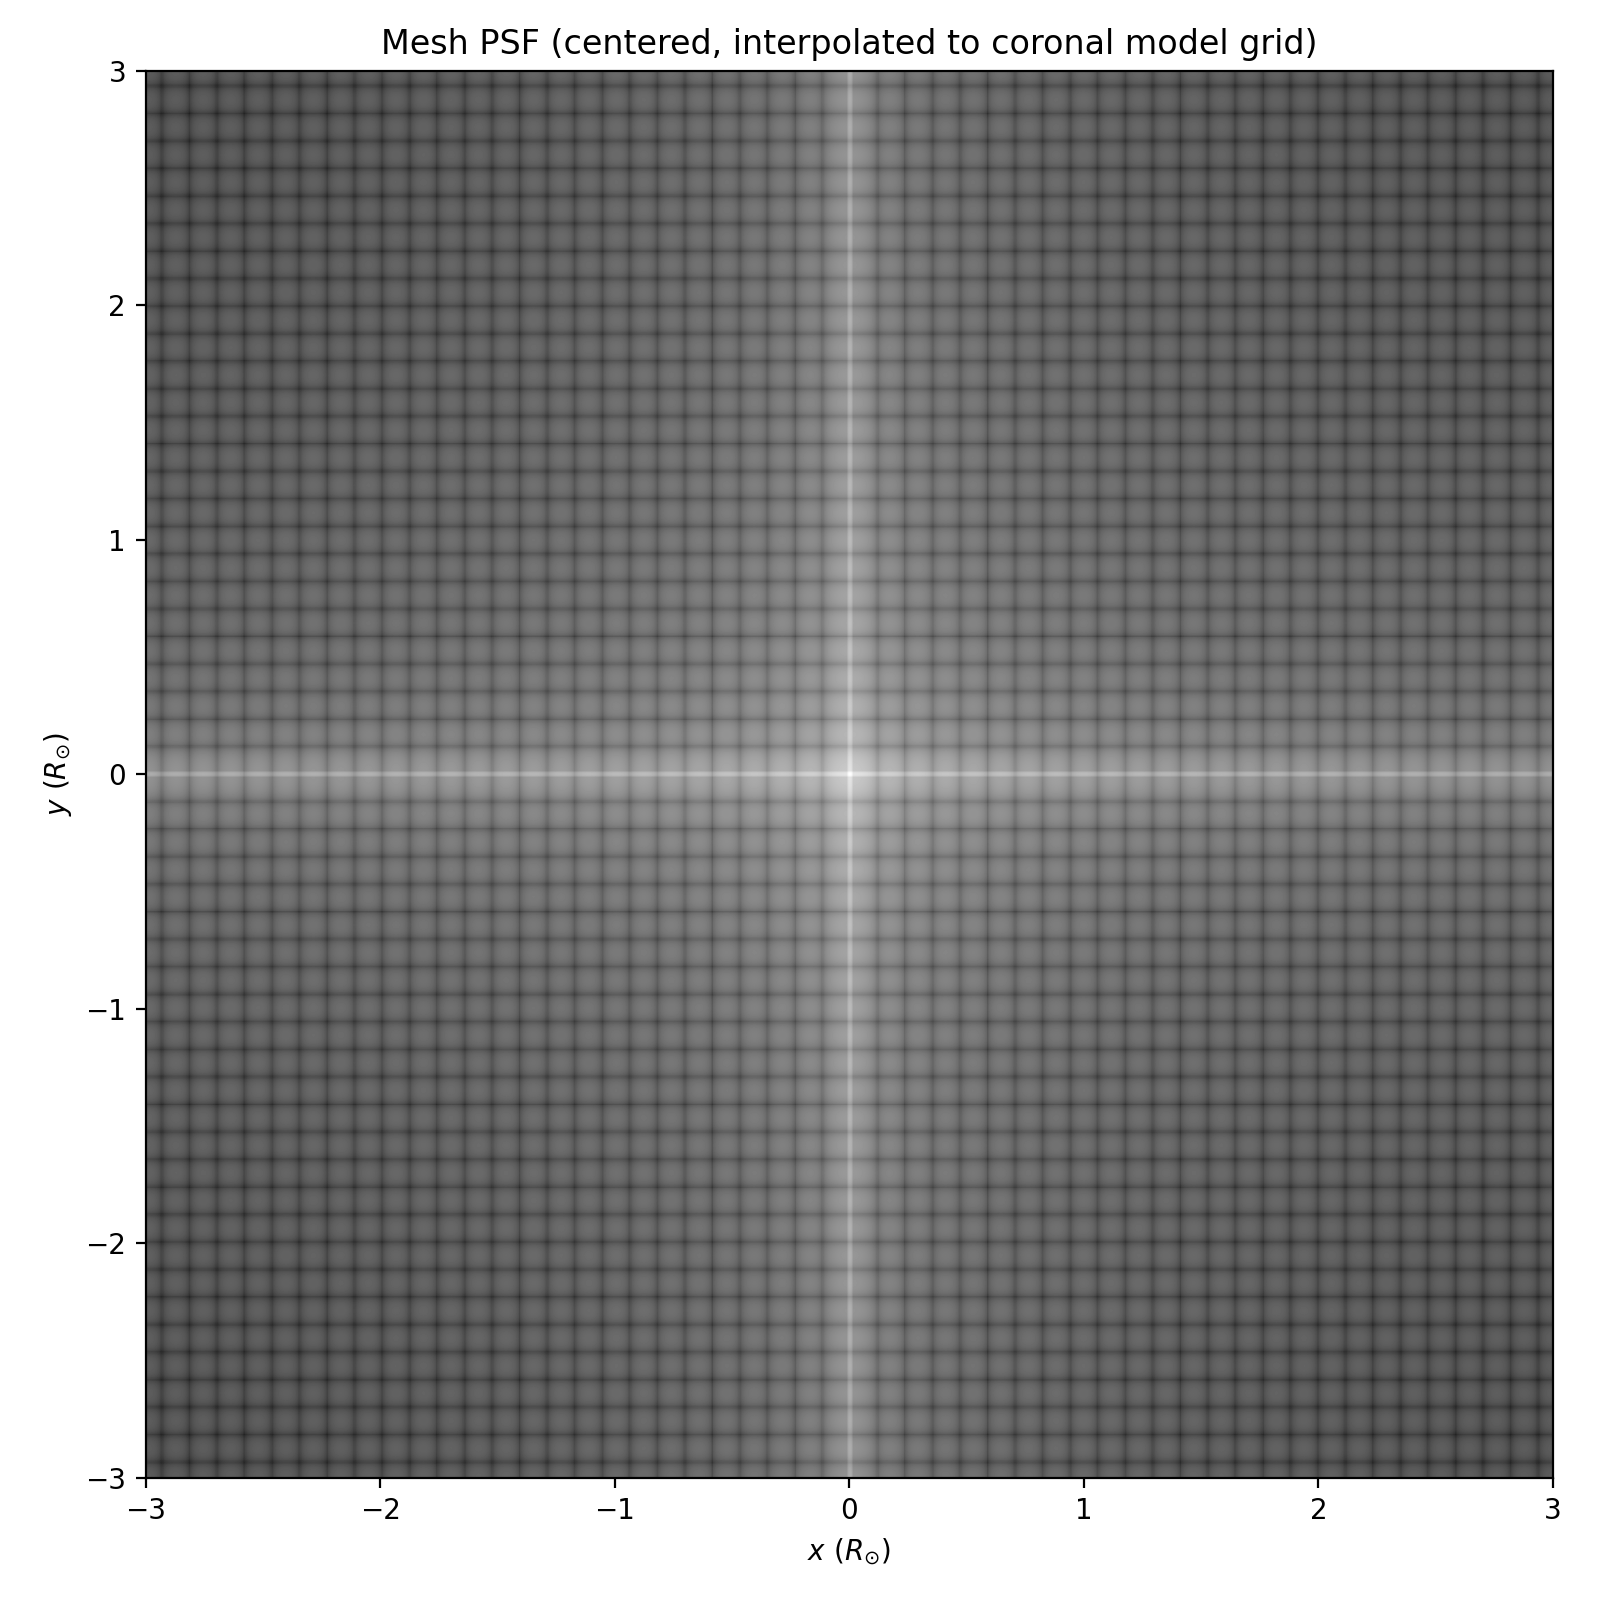

In [19]:
# Display the centered mesh PSF
plt.figure(figsize=(8,8))
plt.imshow(L10(mesh_PSF_cent_interp), origin='lower', cmap='gray',
           extent=(xmin,xmax,xmin,xmax))
plt.title('Mesh PSF (centered, interpolated to coronal model grid)')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.tight_layout()
plt.show()

In [20]:
# Convolve mesh PSF with corona
mesh_PSF_fft_padded = np.abs((np.fft.fft2( pad(mesh_PSF_cent_interp) ))) # abs() shifts the xy origin to the right place.
corona_thru_mesh = unpad(np.real(np.fft.ifft2(mesh_PSF_fft_padded*fcorona_padded)))

<IPython.core.display.Javascript object>


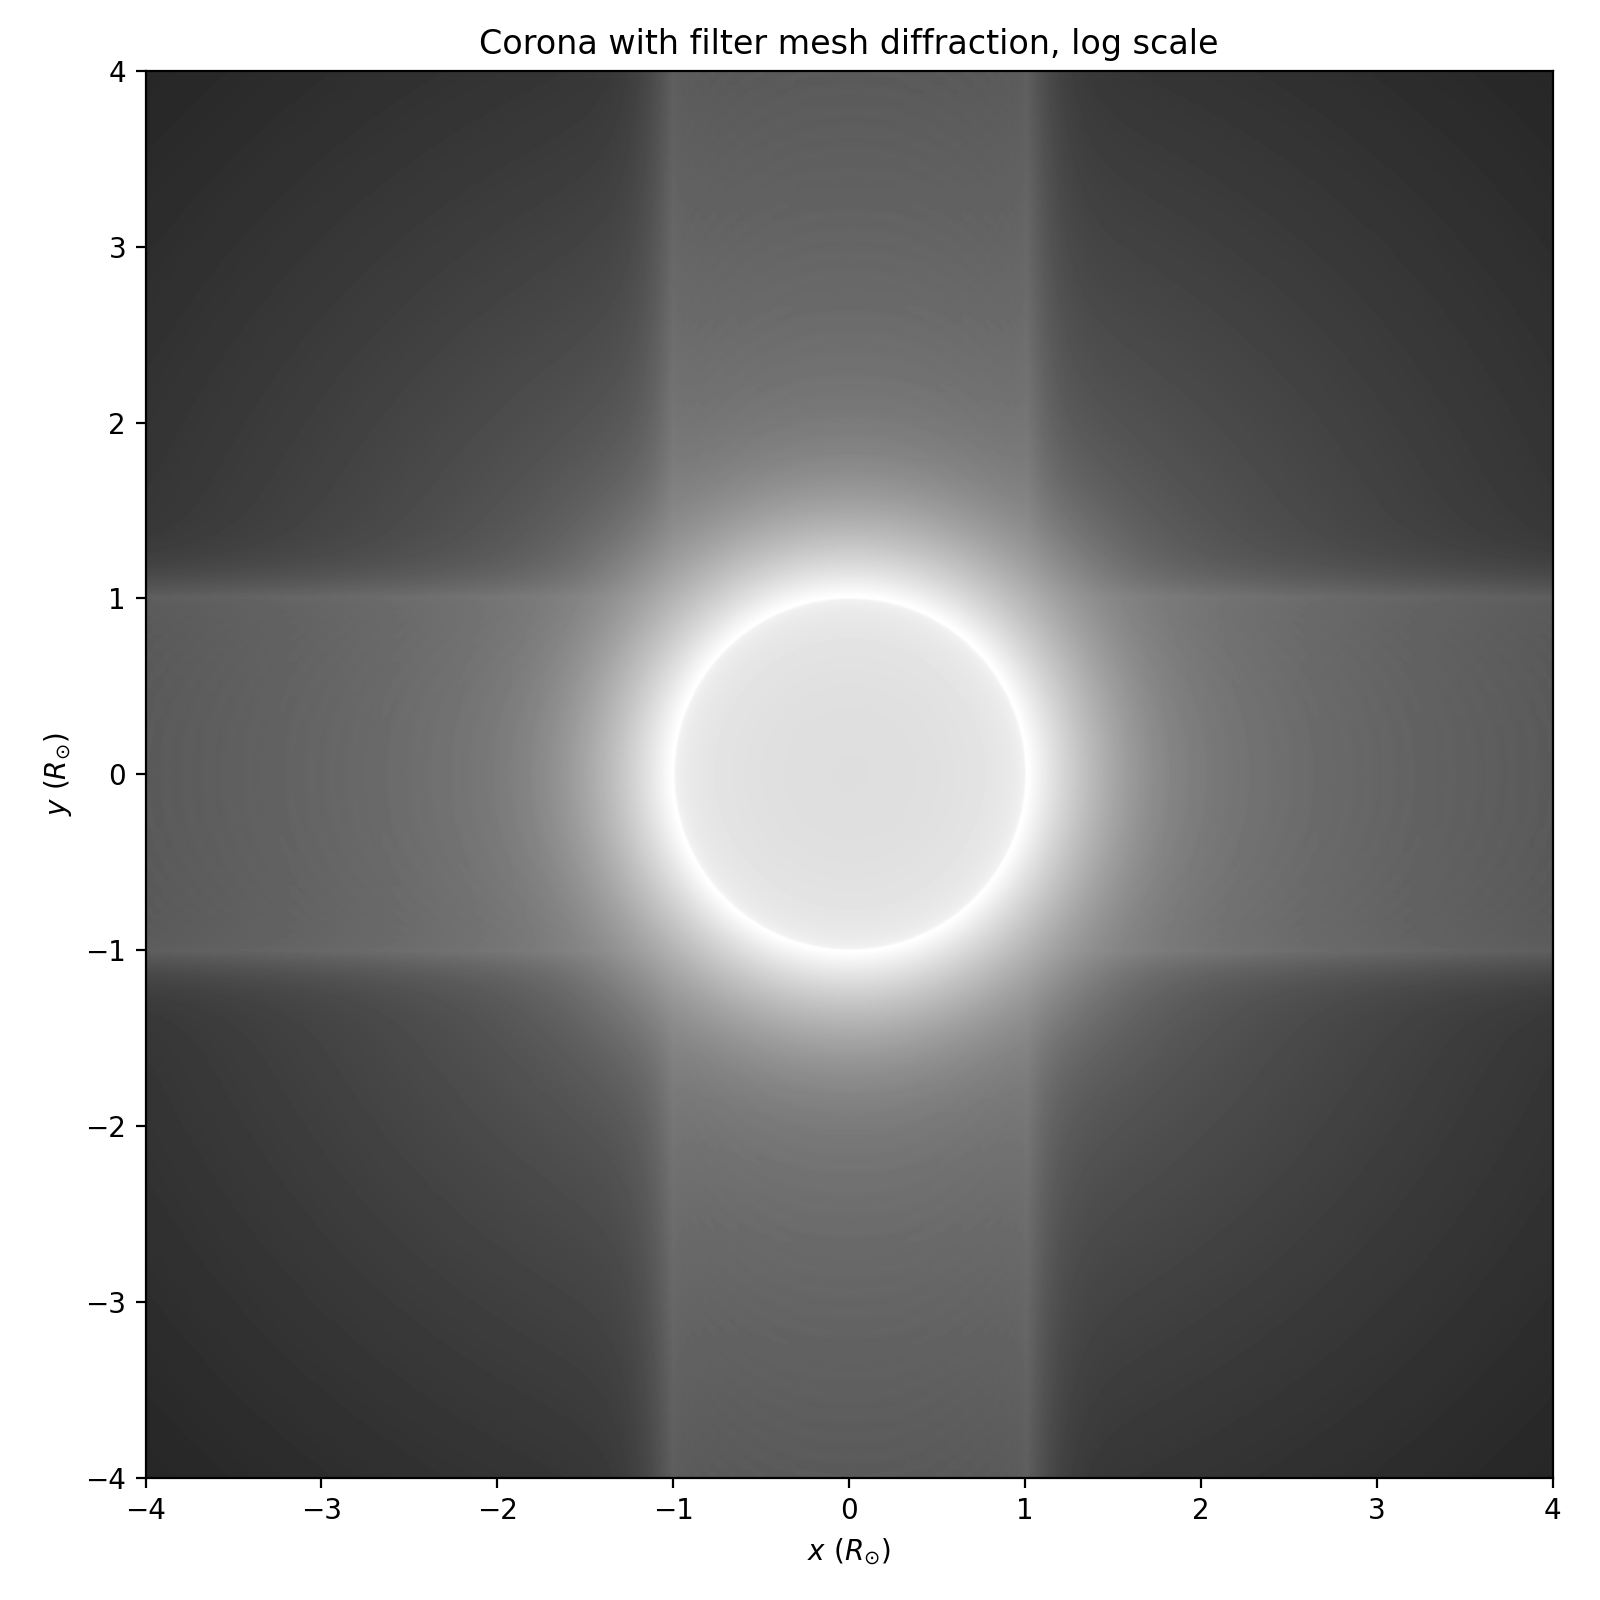

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(L10(corona_thru_mesh), origin='lower', cmap='gray',
           extent=(xmin,xmax,xmin,xmax))
plt.title('Corona with filter mesh diffraction, log scale')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


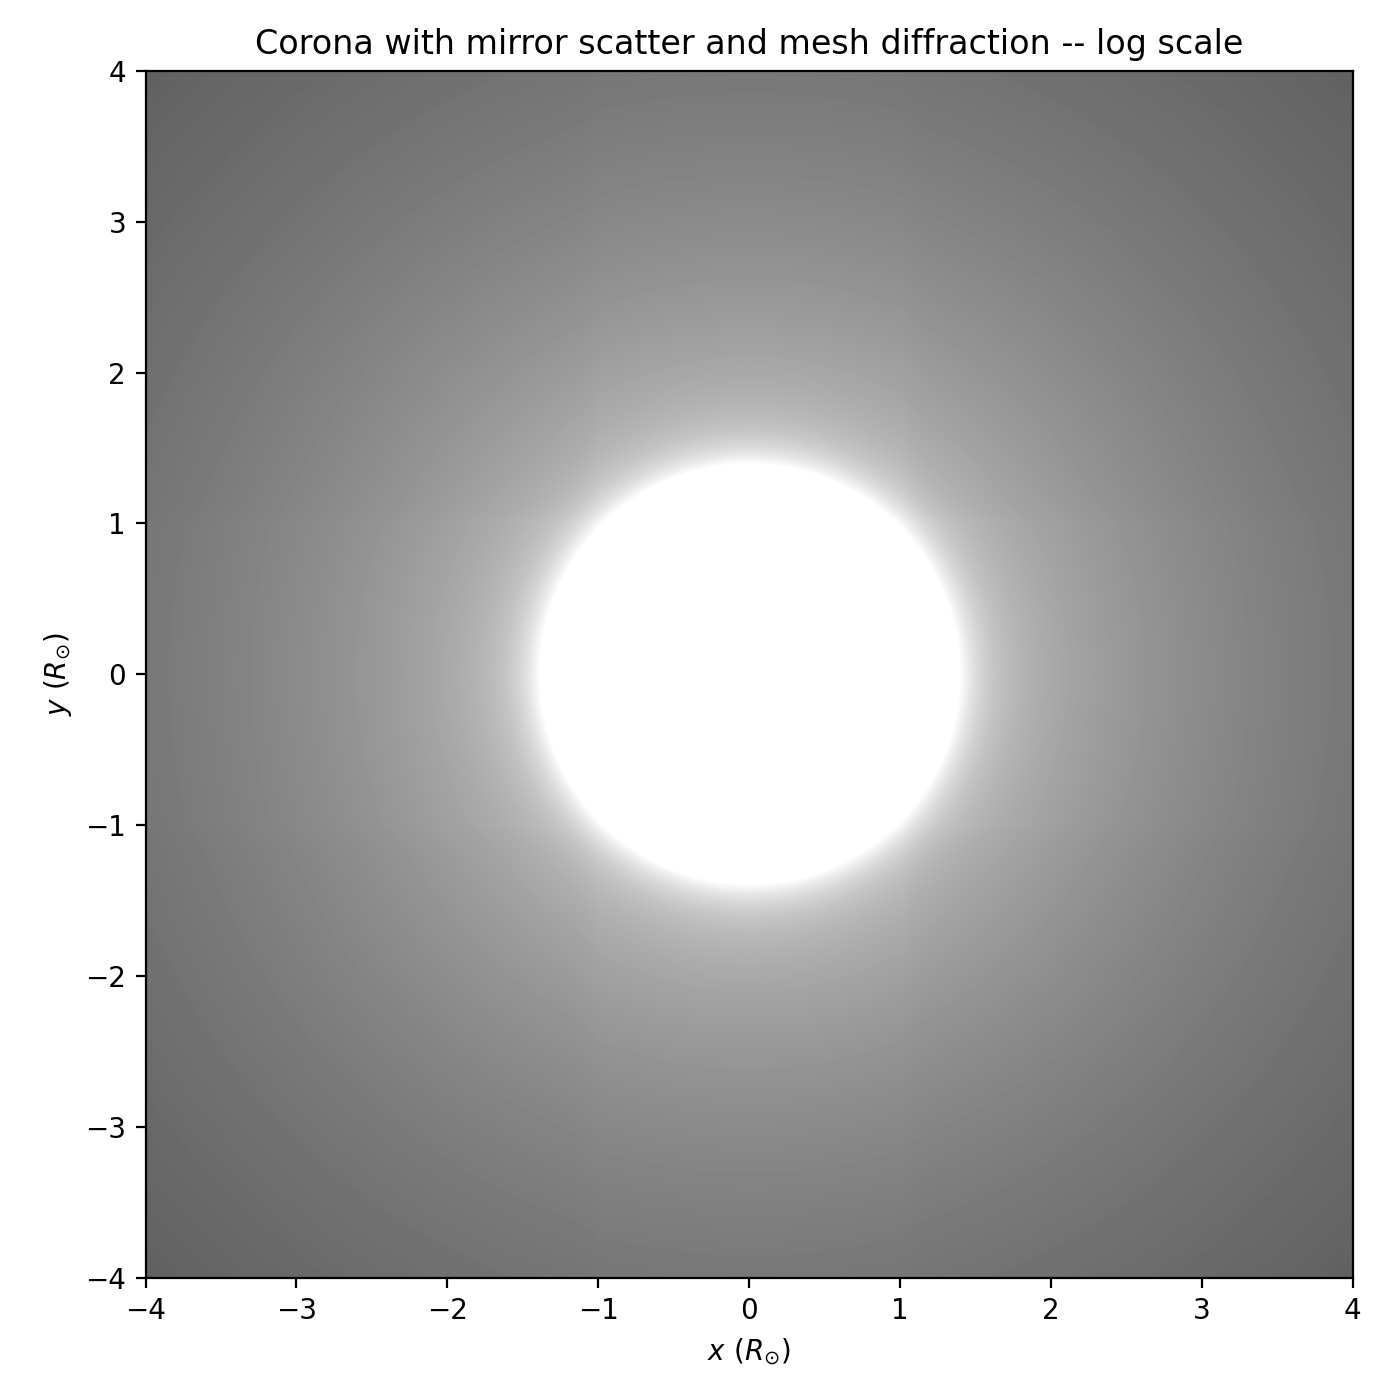

In [22]:
# Simulated observation (noiseless)
what_we_really_see = corona_thru_mesh * (1 - eta_SUVI) + background*Tmesh
plt.figure(figsize=(7,7))
plt.imshow(L10(what_we_really_see), origin='lower', cmap='gray',
           extent=(xmin,xmax,xmin,xmax), vmax=-2)
plt.title('Corona with mirror scatter and mesh diffraction -- log scale')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


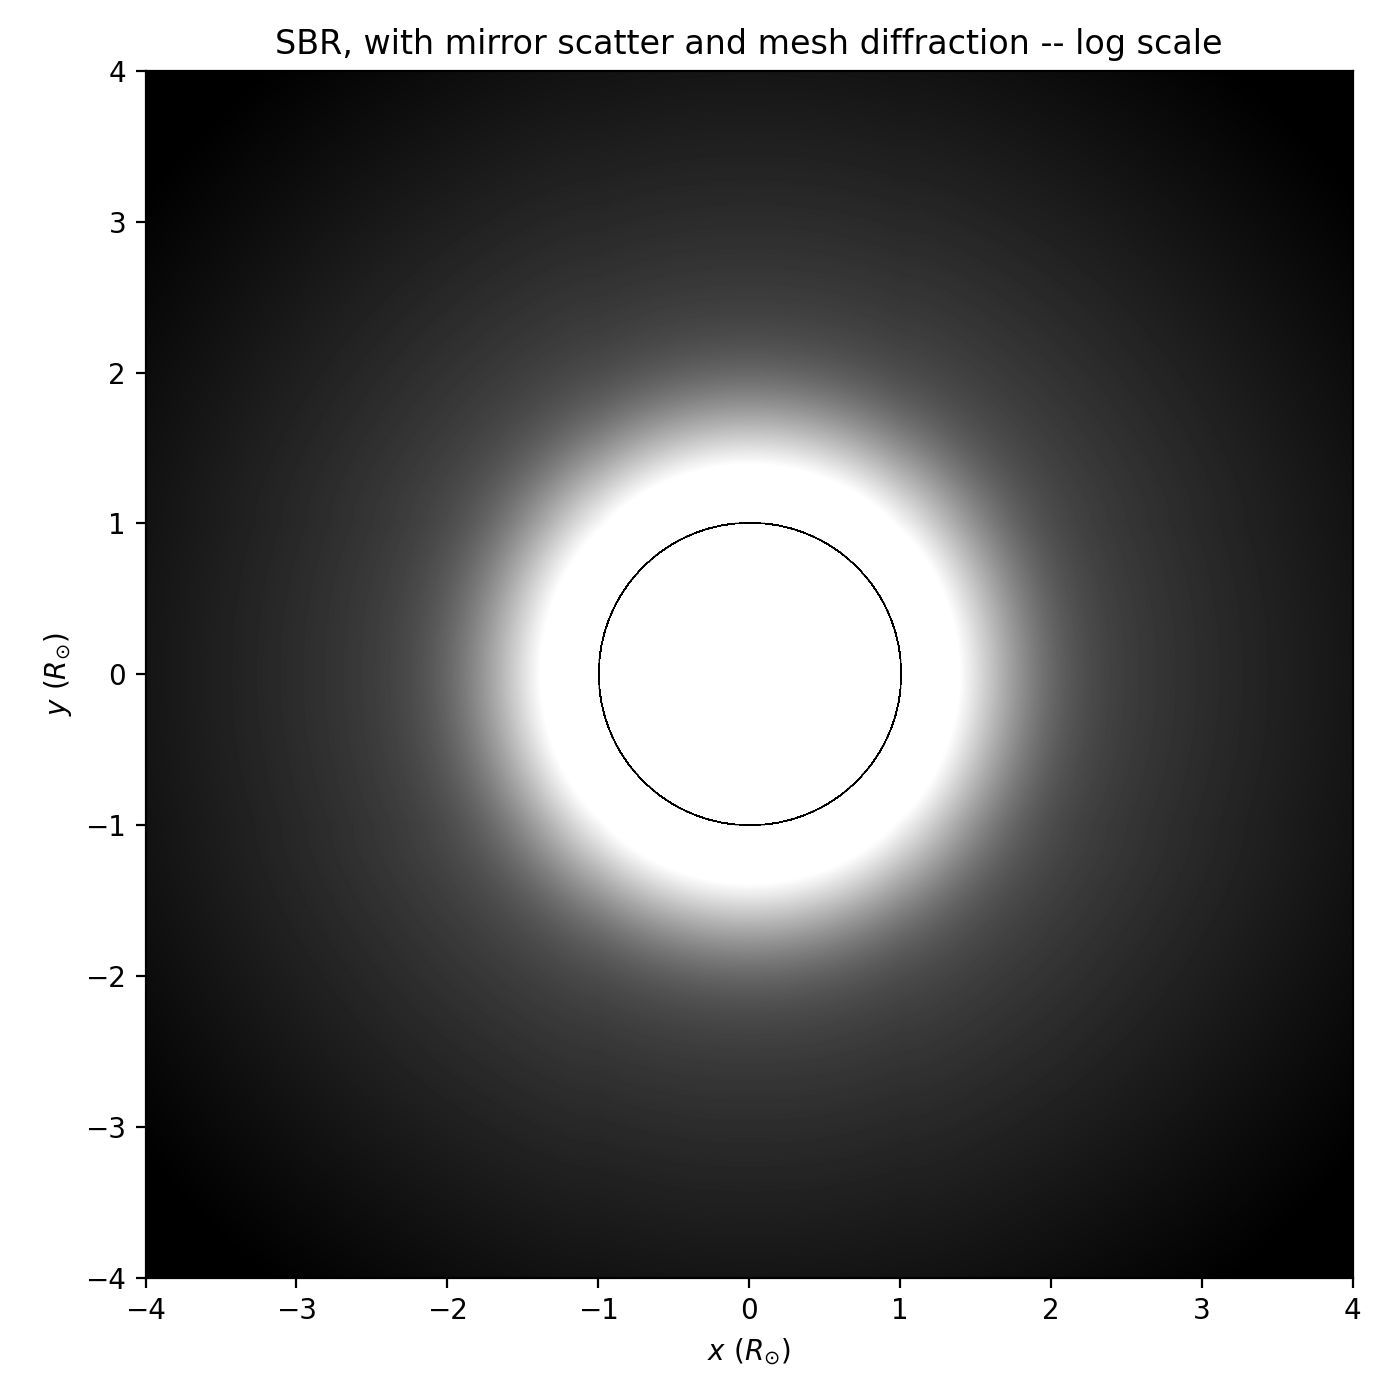

In [23]:
signal_all = corona*Tmesh*(1-eta_SUVI)
background_all = what_we_really_see - signal_all
SBR_all = signal_all / background_all
plt.figure(figsize=(7,7))
plt.imshow(L10(SBR_all), origin='lower', cmap='gray', vmin=L10(SBR_all[0,0]), vmax=0,
           extent=(xmin,xmax,xmin,xmax))
plt.title('SBR, with mirror scatter and mesh diffraction -- log scale')
plt.xlabel(r'$x\ (R_{\odot})$')
plt.ylabel(r'$y\ (R_{\odot})$')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.tight_layout()
plt.show()

## Conclusion
The bottom line is that mirror scatter is a big problem. The filter mesh adds some more background, but even with the standard Luxél 70 LPI mesh, filter diffraction has less impact than the mirror scatter. In the above SBR image, I cannot even make out the cross-shaped signagure of the filter diffraction.